
 **PGCC009 Ciência de Dados e Aprendizado de Máquina<br>
Atividade 2**

Para esta atividade vamos usar uma base disponibilizada pela iniciativa Dados Abertos de Feira (https://www.dadosabertosdefeira.com.br/) com dados de Assiduidade dos vereadores pelo painel eletrônico da Câmara de Vereadores de Feira de Santana, e podem ser acessados em https://www.kaggle.com/dadosabertosdefeira/assiduidade-dos-vereadores-painel-eletronico

Foram disponibilizados dados no formato texto original e também em JSON, obtidos por script que extraiu e estruturou a informações. Com base no JSON, foi extraído um CSV  (código disponível em https://www.kaggle.com/dadosabertosdefeira/assiduidade-dos-vereadores-painel-eletronico/code)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import scipy.stats as st
from statsmodels.stats import weightstats as stests
from sklearn.linear_model import LinearRegression

from IPython.display import display, HTML

import urllib.request

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36')]
urllib.request.install_opener(opener)

url = "http://aulas.artificial.eng.br/Home/pgcc009/AssiduidadeVereadoresFeiradeSantana-DadosAbertosdeFeira.csv.zip"
urllib.request.urlretrieve (url, "assiduidade.csv.zip")

paineldf = pd.read_csv("assiduidade.csv.zip",index_col=False, compression='zip')

paineldf['date']= pd.to_datetime(paineldf['date'], format='%d/%m/%Y')

import datetime

In [ ]:
display("DIMENSOES",paineldf.shape)

display(paineldf.head(2))

'DIMENSOES'

(15195, 11)

,Unnamed: 0,agency,report,session,date,report_generated_by,report_generated_at,name,party,text,attendance
0,0,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,ALBERTO NERY,PT,NaN,attending
1,1,Câmara Municipal de Ferira de Santana,Relatório de Presenças por Reunião,35ª SESSÃO ORDINÁRIA,2020-06-01,Yago Shamady,03/06/2020 10:59,CADMIEL PEREIRA,DEM,NaN,attending


O conjunto de dados de Assiduidade dos vereadores pelo painel eletrônico tem 15195 registros e 11 atributos.

In [ ]:
display(paineldf.nunique())

display(paineldf.dtypes)

Unnamed: 0              28
agency                   1
report                   1
session                223
date                   438
report_generated_by      1
report_generated_at    209
name                    41
party                   16
text                    12
attendance               3
dtype: int64

Unnamed: 0                      int64
agency                         object
report                         object
session                        object
date                   datetime64[ns]
report_generated_by            object
report_generated_at            object
name                           object
party                          object
text                           object
attendance                     object
dtype: object

#1 - Quem são os vereadores de cada partido a cada ano? Você observa mudanças? Com base em sua análise dos dados, comente sobre o que observa.

In [ ]:
anos = paineldf['date'].dt.year.unique()

display('Anos de coleta dos dados presentes na base')
display(anos)

'Anos de coleta dos dados presentes na base'

array([2020, 2017, 2019, 2021, 2018])

In [ ]:
partidos = paineldf['party'].unique()
display('Partidos com vereadores presentes na base de dados')
display(partidos)

'Partidos com vereadores presentes na base de dados'

array(['PT', 'DEM', 'MDB', 'REP', 'PROS', 'PSB', 'PATRI', 'PSD', 'PSDB',
       'PHS', 'DC', 'PSOL', 'PL', 'PSC', 'CIDADAN', 'PV'], dtype=object)

In [ ]:
ano2017 = (paineldf['date'].dt.year == 2017)
ano2018 = (paineldf['date'].dt.year == 2018)
ano2019 = (paineldf['date'].dt.year == 2019)
ano2020 = (paineldf['date'].dt.year == 2020)

df2017 = pd.DataFrame()
for partido in partidos:
  for vereador in paineldf['name'][ano2017 & (paineldf['party'] == partido)].unique():
    df = pd.DataFrame([[vereador, partido]], columns=['name', 'party'])
    df2017 = df2017.append(df, ignore_index=True)

df2018 = pd.DataFrame()
for partido in partidos:
  for vereador in paineldf['name'][ano2018 & (paineldf['party'] == partido)].unique():
    df = pd.DataFrame([[vereador, partido]], columns=['name', 'party'])
    df2018 = df2018.append(df, ignore_index=True)

df2019 = pd.DataFrame()
for partido in partidos:
  for vereador in paineldf['name'][ano2019 & (paineldf['party'] == partido)].unique():
    df = pd.DataFrame([[vereador, partido]], columns=['name', 'party'])
    df2019 = df2019.append(df, ignore_index=True)

df2020 = pd.DataFrame()
for partido in partidos:
  for vereador in paineldf['name'][ano2020 & (paineldf['party'] == partido)].unique():
    df = pd.DataFrame([[vereador, partido]], columns=['name', 'party'])
    df2020 = df2020.append(df, ignore_index=True)

df2017_2020 = pd.DataFrame()
display('Vereadores por partido no período de 2017-2020')
for partido in partidos:
  for vereador in paineldf['name'][(ano2017 | ano2018 | ano2019 | ano2020) & (paineldf['party'] == partido)].unique():
    df = pd.DataFrame([[vereador, partido]], columns=['name', 'party'])
    df2017_2020 = df2017_2020.append(df, ignore_index=True)
display(df2017_2020)

'Vereadores por partido no período de 2017-2020'

,name,party
0,ALBERTO NERY,PT
1,CADMIEL PEREIRA,DEM
2,GERUSA SAMPAIO,DEM
3,LULINHA,DEM
4,MARCOS LIMA,DEM
5,NEINHA,DEM
6,ZÉ CURUCA,DEM
7,ANTONIO CARLOS ATAÍDE,DEM
8,JUSTINIANO FRANÇA,DEM
9,PABLO ROBERTO,DEM


In [ ]:
ano2021 = (paineldf['date'].dt.year == 2021)

df2021 = pd.DataFrame()
display('Vereadores por partido no ano de 2021')
for partido in partidos:
  for vereador in paineldf['name'][ano2021 & (paineldf['party'] == partido)].unique():
    df = pd.DataFrame([[vereador, partido]], columns=['name', 'party'])
    df2021 = df2021.append(df, ignore_index=True)
display(df2021)

vereadores2021 = df2021.sort_values('name')['name'].values

'Vereadores por partido no ano de 2021'

,name,party
0,PROFESSOR IVAMBERG,PT
1,SILVIO DIAS,PT
2,LULINHA,DEM
3,PEDRO AMÉRICO,DEM
4,ZÉ CURUCA,DEM
5,GERUSA SAMPAIO,DEM
6,EDVALDO LIMA,MDB
7,FABIANO DA VAN,MDB
8,LÚ DE RONNY,MDB
9,RON DO POVO,MDB


In [ ]:
lista2020 = paineldf['name'][ano2020].unique().tolist()
lista2021 = paineldf['name'][ano2021].unique().tolist()
vereadores_todo_ano = sorted([vereador for vereador in lista2020 if vereador in lista2021])

display('Vereadores atuantes em todo o período abrangido pelo dataset, e partidos')
for vereador in vereadores_todo_ano:
  print(vereador, '-',paineldf['party'][paineldf['name'] == vereador].unique()[0])

'Vereadores atuantes em todo o período abrangido pelo dataset, e partidos'

EDVALDO LIMA - MDB
ELI RIBEIRO - REP
EREMITA MOTA - PSDB
FABIANO DA VAN - MDB
GERUSA SAMPAIO - DEM
JOSÉ CARNEIRO - MDB
LUIZ DA FEIRA - PROS
LULINHA - DEM
RON DO POVO - MDB
ZÉ CURUCA - DEM


Em relação ao PT, Alberto Nery era o único vereador no período de 2017 a 2020, já após as eleições de 2021, o partido conta com dois vereadores, Professor Ivamberg e Sílvio Dias. O DEM ocupava 9 cadeiras, e em 2021 ocupa 4, dos 4 vereadores, três foram reeleitos em 2020. O MDB ocupava 6 cadeiras, e em 2021 ocupa 5, dos 5 vereadores, quatro foram reeleitos em 2020. O REP ocupava 2 cadeiras, e as manteve em 2021, sendo um verador reeleito e outro não.

Apenas os vereadores Edvaldo Lima - MDB, Eli Ribeiro - REP, Eremita Mota - PSDB, Fabiano da Van - MDB, Gerusa Sampaio - DEM, José Carneiro - MDB, Luiz da Feira - PROS, Lulinha - DEM, Ron do Povo - MDB, e Zé Curuca - DEM conseguiram a reeleição.

Alguns partidos passaram a ter cadeiras ocupadas depois da eleição, como por exemplo o PSOL, com Jhonatas Monteiro, o DC, com Emerson Minho, o PL, com Jurandy Carvalho, o PSC, com Paulão do Caldeirão, o Cidadania, com Pedro Cícero, e o PV, com o Pr. Valdemir Santos. Dos partidos que ocupavam cadeiras de 2017 a 2020, o PHS foi o único que não ocupa cadeiras em 2021.

Um total de 13 vereadores não estavam de 2017 a 2020, e ocupam cadeiras em 2021.

Houve uma diminuição das cadeiras na câmara, de 26 para 23 vereadores.

#2 - Quem são os vereadores com maior quantidade (absoluta e relativa) de presenças, ausências e faltas justificadas a cada ano? Faça esta análise também por partido (agrupando vereadores por partido). Comente sobre o que você observa na análise dos dados.

In [ ]:
paineldf['attendance'].unique()

array(['attending', 'justified', 'absent'], dtype=object)

In [ ]:
ano2017 = (paineldf['date'].dt.year == 2017)

presenca = (paineldf['attendance'] == 'attending')
presencas2017 = paineldf[ano2017 & presenca].groupby(['name', 'party'])
presencas2017 = presencas2017['name'].count().reset_index(name='quantidade_presencas').sort_values('quantidade_presencas', ascending=False)
display('Presenças dos vereadores no ano de 2017')
display(presencas2017)
print('\n')

ausencia = (paineldf['attendance'] == 'absent')
ausencias2017 = paineldf[ano2017 & ausencia].groupby(['name', 'party'])
ausencias2017 = ausencias2017['name'].count().reset_index(name='quantidade_ausencias').sort_values('quantidade_ausencias', ascending=False)
display('Ausências dos vereadores no ano de 2017')
display(ausencias2017)
print('\n')

justificativa = (paineldf['attendance'] == 'justified')
justificativas2017 = paineldf[ano2017 & justificativa].groupby(['name', 'party'])
justificativas2017 = justificativas2017['name'].count().reset_index(name='quantidade_justificativas').sort_values('quantidade_justificativas', ascending=False)
display('Justificativas dos vereadores no ano de 2017')
display(justificativas2017)

'Presenças dos vereadores no ano de 2017'

,name,party,quantidade_presencas
7,GERUSA SAMPAIO,DEM,81
10,JOSÉ CARNEIRO,MDB,74
2,CADMIEL PEREIRA,DEM,73
18,ROBERTO TOURINHO,PSB,68
13,LULINHA,DEM,68
9,ISAÍAS DE DIOGO,MDB,67
11,JOÃO BILILIU,PSD,64
19,RON DO POVO,MDB,64
21,ZÉ CURUCA,DEM,63
12,LUIZ DA FEIRA,PROS,63


'Ausências dos vereadores no ano de 2017'

,name,party,quantidade_ausencias
3,CÍNTIA MACHADO,REP,43
17,PR TOM,PATRI,37
0,ALBERTO NERY,PT,29
1,ANTONIO CARLOS ATAÍDE,DEM,27
15,NEINHA,DEM,27
5,EREMITA MOTA,PSDB,27
14,MARCOS LIMA,DEM,26
22,ZÉ FILÉ,PSD,26
8,GILMAR AMORIM,MDB,24
4,EDVALDO LIMA,MDB,24


'Justificativas dos vereadores no ano de 2017'

,name,party,quantidade_justificativas
0,ELI RIBEIRO,REP,85
1,JUSTINIANO FRANÇA,DEM,85
4,ROBECI DA VASSOURA,PHS,85
6,SGT JOSAFÁ RAMOS,PATRI,85
5,RONNY,PHS,81
3,PABLO ROBERTO,DEM,71
2,NEINHA,DEM,18


In [ ]:
total_2017 = len(paineldf['session'][ano2017].unique())
display('Total de Sessões em 2017')
display(total_2017)
print()

participacoes2017 = pd.DataFrame()
display('Comparecimento dos vereadores no ano de 2017')
for vereador in df2017['name']:
  df = pd.DataFrame([[vereador,
                      df2017['party'][(df2017['name'] == vereador)].values[0],
                      presencas2017['quantidade_presencas'][(presencas2017['name'] == vereador)].values[0] if vereador in presencas2017['name'].values else 0,
                      ausencias2017['quantidade_ausencias'][(ausencias2017['name'] == vereador)].values[0] if vereador in ausencias2017['name'].values else 0,
                      justificativas2017['quantidade_justificativas'][(justificativas2017['name'] == vereador)].values[0] if vereador in justificativas2017['name'].values else 0,
                      round((presencas2017['quantidade_presencas'][(presencas2017['name'] == vereador)].values[0]) / total_2017 * 100, 2) if vereador in presencas2017['name'].values else 0,
                      round((ausencias2017['quantidade_ausencias'][(ausencias2017['name'] == vereador)].values[0]) / total_2017 * 100, 2) if vereador in ausencias2017['name'].values else 0,
                      round((justificativas2017['quantidade_justificativas'][(justificativas2017['name'] == vereador)].values[0]) / total_2017 * 100, 2) if vereador in justificativas2017['name'].values else 0]],
                    columns=['name', 'party', 'presenca', 'ausencia', 'justificativa', 'presenca_rel', 'ausencia_rel', 'justificativa_rel'])
  participacoes2017 = participacoes2017.append(df, ignore_index=True)

display(participacoes2017)

'Total de Sessões em 2017'

85

'Comparecimento dos vereadores no ano de 2017'

,name,party,presenca,ausencia,justificativa,presenca_rel,ausencia_rel,justificativa_rel
0,ALBERTO NERY,PT,56,29,0,65.88,34.12,0.00
1,ANTONIO CARLOS ATAÍDE,DEM,58,27,0,68.24,31.76,0.00
2,CADMIEL PEREIRA,DEM,73,12,0,85.88,14.12,0.00
3,GERUSA SAMPAIO,DEM,81,4,0,95.29,4.71,0.00
4,LULINHA,DEM,68,17,0,80.00,20.00,0.00
5,MARCOS LIMA,DEM,59,26,0,69.41,30.59,0.00
6,NEINHA,DEM,40,27,18,47.06,31.76,21.18
7,ZÉ CURUCA,DEM,63,22,0,74.12,25.88,0.00
8,JUSTINIANO FRANÇA,DEM,0,0,85,0.00,0.00,100.00
9,PABLO ROBERTO,DEM,10,4,71,11.76,4.71,83.53


No ano de 2017, Gerusa Sampaio (DEM) foi a veradora com maior quantidade absoluta de presenças, com 81 (95.29%); Cíntia Machado (REP) foi a vereadora com maior quantidade absoluta de ausências, com 43 (50.59%); Eli Ribeiro, Justiniano França, Robeci da Vassoura e Sgt. Josafá Ramos foram os vereadores com maior quantidade absoluta de justificativas, com 85 (100%).

In [ ]:
ano2018 = (paineldf['date'].dt.year == 2018)

presenca = (paineldf['attendance'] == 'attending')

presencas2018 = paineldf[ano2018 & presenca].groupby(['name', 'party'])
presencas2018 = presencas2018['name'].count().reset_index(name='quantidade_presencas').sort_values('quantidade_presencas', ascending=False)
display('Presenças dos vereadores no ano de 2018')
display(presencas2018)
print('\n')

ausencia = (paineldf['attendance'] == 'absent')
ausencias2018 = paineldf[ano2018 & ausencia].groupby(['name', 'party'])
ausencias2018 = ausencias2018['name'].count().reset_index(name='quantidade_ausencias').sort_values('quantidade_ausencias', ascending=False)
display('Ausências dos vereadores no ano de 2018')
display(ausencias2018)
print('\n')

justificativa = (paineldf['attendance'] == 'justified')
justificativas2018 = paineldf[ano2018 & justificativa].groupby(['name', 'party'])
justificativas2018 = justificativas2018['name'].count().reset_index(name='quantidade_justificativas').sort_values('quantidade_justificativas', ascending=False)
display('Justificativas dos vereadores no ano de 2018')
display(justificativas2018)

'Presenças dos vereadores no ano de 2018'

,name,party,quantidade_presencas
10,JOSÉ CARNEIRO,MDB,175
7,GERUSA SAMPAIO,DEM,159
13,LULINHA,DEM,146
2,CADMIEL PEREIRA,DEM,140
17,ROBERTO TOURINHO,PSB,133
9,ISAÍAS DE DIOGO,MDB,131
18,RON DO POVO,MDB,127
8,GILMAR AMORIM,MDB,127
19,ZÉ CURUCA,DEM,124
4,EDVALDO LIMA,MDB,124


'Ausências dos vereadores no ano de 2018'

,name,party,quantidade_ausencias
16,PR TOM,PATRI,110
3,CÍNTIA MACHADO,REP,108
0,ALBERTO NERY,PT,76
5,EREMITA MOTA,PSDB,75
20,ZÉ FILÉ,PSD,75
12,LUIZ DA FEIRA,PROS,72
1,ANTONIO CARLOS ATAÍDE,DEM,70
15,NEINHA,DEM,70
6,FABIANO DA VAN,MDB,68
11,JOÃO BILILIU,PSD,67


'Justificativas dos vereadores no ano de 2018'

,name,party,quantidade_justificativas
0,ELI RIBEIRO,REP,188
1,JUSTINIANO FRANÇA,DEM,188
2,PABLO ROBERTO,DEM,188
3,ROBECI DA VASSOURA,PHS,188
4,RONNY,PHS,188
5,SGT JOSAFÁ RAMOS,PATRI,188


In [ ]:
total_2018 = len(paineldf['session'][ano2018].unique())
display('Total de Sessões em 2018')
display(total_2018)
print()

participacoes2018 = pd.DataFrame()
display('Comparecimento dos vereadores no ano de 2018')
for vereador in df2018['name']:
  df = pd.DataFrame([[vereador,
                      df2018['party'][(df2018['name'] == vereador)].values[0],
                      presencas2018['quantidade_presencas'][(presencas2018['name'] == vereador)].values[0] if vereador in presencas2018['name'].values else 0,
                      ausencias2018['quantidade_ausencias'][(ausencias2018['name'] == vereador)].values[0] if vereador in ausencias2018['name'].values else 0,
                      justificativas2018['quantidade_justificativas'][(justificativas2018['name'] == vereador)].values[0] if vereador in justificativas2018['name'].values else 0,
                      round((presencas2018['quantidade_presencas'][(presencas2018['name'] == vereador)].values[0]) / total_2018 * 100, 2) if vereador in presencas2018['name'].values else 0,
                      round((ausencias2018['quantidade_ausencias'][(ausencias2018['name'] == vereador)].values[0]) / total_2018 * 100, 2) if vereador in ausencias2018['name'].values else 0,
                      round((justificativas2018['quantidade_justificativas'][(justificativas2018['name'] == vereador)].values[0]) / total_2018 * 100, 2) if vereador in justificativas2018['name'].values else 0]],
                    columns=['name', 'party', 'presenca', 'ausencia', 'justificativa', 'presenca_rel', 'ausencia_rel', 'justificativa_rel'])
  participacoes2018 = participacoes2018.append(df, ignore_index=True)

display(participacoes2018)

'Total de Sessões em 2018'

188

'Comparecimento dos vereadores no ano de 2018'

,name,party,presenca,ausencia,justificativa,presenca_rel,ausencia_rel,justificativa_rel
0,ALBERTO NERY,PT,112,76,0,59.57,40.43,0.0
1,GERUSA SAMPAIO,DEM,159,29,0,84.57,15.43,0.0
2,ANTONIO CARLOS ATAÍDE,DEM,118,70,0,62.77,37.23,0.0
3,CADMIEL PEREIRA,DEM,140,48,0,74.47,25.53,0.0
4,LULINHA,DEM,146,42,0,77.66,22.34,0.0
5,MARCOS LIMA,DEM,124,64,0,65.96,34.04,0.0
6,NEINHA,DEM,118,70,0,62.77,37.23,0.0
7,ZÉ CURUCA,DEM,124,63,0,65.96,33.51,0.0
8,JUSTINIANO FRANÇA,DEM,0,0,188,0.00,0.00,100.0
9,PABLO ROBERTO,DEM,0,0,188,0.00,0.00,100.0


No ano de 2018, José Carneiro	(MDB)	foi o verador com maior quantidade absoluta de presenças, com 175 (93.09%); Pr. Tom foi o vereador com maior quantidade absoluta de ausências, com 110 (58.51%); Eli Ribeiro, Justiniano França, Robeci da Vassoura, Sgt. Josafá Ramos e Ronny foram os vereadores com maior quantidade absoluta de justificativas, com 188 (100%).

In [ ]:
ano2019 = (paineldf['date'].dt.year == 2019)

presenca = (paineldf['attendance'] == 'attending')

presencas2019 = paineldf[ano2019 & presenca].groupby(['name', 'party'])
presencas2019 = presencas2019['name'].count().reset_index(name='quantidade_presencas').sort_values('quantidade_presencas', ascending=False)
display('Presenças dos vereadores no ano de 2019')
display(presencas2019)
print('\n')

ausencia = (paineldf['attendance'] == 'absent')
ausencias2019 = paineldf[ano2019 & ausencia].groupby(['name', 'party'])
ausencias2019 = ausencias2019['name'].count().reset_index(name='quantidade_ausencias').sort_values('quantidade_ausencias', ascending=False)
display('Ausências dos vereadores no ano de 2019')
display(ausencias2019)
print('\n')

justificativa = (paineldf['attendance'] == 'justified')
justificativas2019 = paineldf[ano2019 & justificativa].groupby(['name', 'party'])
justificativas2019 = justificativas2019['name'].count().reset_index(name='quantidade_justificativas').sort_values('quantidade_justificativas', ascending=False)
display('Justificativas dos vereadores no ano de 2019')
display(justificativas2019)

'Presenças dos vereadores no ano de 2019'

,name,party,quantidade_presencas
7,GERUSA SAMPAIO,DEM,164
10,JOSÉ CARNEIRO,MDB,162
2,CADMIEL PEREIRA,DEM,144
13,LULINHA,DEM,143
17,ROBERTO TOURINHO,PSB,137
11,JOÃO BILILIU,PSD,130
9,ISAÍAS DE DIOGO,MDB,130
0,ALBERTO NERY,PT,130
14,MARCOS LIMA,DEM,125
12,LUIZ DA FEIRA,PROS,124


'Ausências dos vereadores no ano de 2019'

,name,party,quantidade_ausencias
3,CÍNTIA MACHADO,REP,83
1,ANTONIO CARLOS ATAÍDE,DEM,74
19,RON DO POVO,MDB,71
21,ZÉ FILÉ,PSD,67
20,ZÉ CURUCA,DEM,67
15,NEINHA,DEM,66
5,EREMITA MOTA,PSDB,64
6,FABIANO DA VAN,MDB,64
17,ROBECI DA VASSOURA,PHS,63
8,GILMAR AMORIM,MDB,62


'Justificativas dos vereadores no ano de 2019'

,name,party,quantidade_justificativas
0,ELI RIBEIRO,REP,185
2,JUSTINIANO FRANÇA,DEM,185
3,PABLO ROBERTO,DEM,185
6,RONNY,PHS,185
7,SGT JOSAFÁ RAMOS,PATRI,185
4,PR TOM,PATRI,184
1,JOSÉ CARNEIRO,MDB,4
5,ROBECI DA VASSOURA,PHS,4


In [ ]:
total_2019 = len(paineldf['session'][ano2019].unique())
display('Total de Sessões em 2019')
display(total_2019)
print()

participacoes2019 = pd.DataFrame()
display('Comparecimento dos vereadores no ano de 2019')
for vereador in df2019['name']:
  df = pd.DataFrame([[vereador,
                      df2019['party'][(df2019['name'] == vereador)].values[0],
                      presencas2019['quantidade_presencas'][(presencas2019['name'] == vereador)].values[0] if vereador in presencas2019['name'].values else 0,
                      ausencias2019['quantidade_ausencias'][(ausencias2019['name'] == vereador)].values[0] if vereador in ausencias2019['name'].values else 0,
                      justificativas2019['quantidade_justificativas'][(justificativas2019['name'] == vereador)].values[0] if vereador in justificativas2019['name'].values else 0,
                      round((presencas2019['quantidade_presencas'][(presencas2019['name'] == vereador)].values[0]) / total_2019 * 100, 2) if vereador in presencas2019['name'].values else 0,
                      round((ausencias2019['quantidade_ausencias'][(ausencias2019['name'] == vereador)].values[0]) / total_2019 * 100, 2) if vereador in ausencias2019['name'].values else 0,
                      round((justificativas2019['quantidade_justificativas'][(justificativas2019['name'] == vereador)].values[0]) / total_2019 * 100, 2) if vereador in justificativas2019['name'].values else 0]],
                    columns=['name', 'party', 'presenca', 'ausencia', 'justificativa', 'presenca_rel', 'ausencia_rel', 'justificativa_rel'])
  participacoes2019 = participacoes2019.append(df, ignore_index=True)

display(participacoes2019)

'Total de Sessões em 2019'

185

'Comparecimento dos vereadores no ano de 2019'

,name,party,presenca,ausencia,justificativa,presenca_rel,ausencia_rel,justificativa_rel
0,ALBERTO NERY,PT,130,55,0,70.27,29.73,0.00
1,ANTONIO CARLOS ATAÍDE,DEM,111,74,0,60.00,40.00,0.00
2,CADMIEL PEREIRA,DEM,144,41,0,77.84,22.16,0.00
3,GERUSA SAMPAIO,DEM,164,21,0,88.65,11.35,0.00
4,LULINHA,DEM,143,42,0,77.30,22.70,0.00
5,MARCOS LIMA,DEM,125,60,0,67.57,32.43,0.00
6,NEINHA,DEM,119,66,0,64.32,35.68,0.00
7,ZÉ CURUCA,DEM,118,67,0,63.78,36.22,0.00
8,JUSTINIANO FRANÇA,DEM,0,0,185,0.00,0.00,100.00
9,PABLO ROBERTO,DEM,0,0,185,0.00,0.00,100.00


No ano de 2019, Gerusa Sampaio (DEM) foi a veradora com maior quantidade absoluta de presenças, com 164 (88.65%); CÍntia Machado (REP)	foi a vereadora com maior quantidade absoluta de ausências, com 83 (44.86%); Eli Ribeiro, Justiniano França, Robeci da Vassoura, Sgt. Josafá Ramos e Ronny foram os vereadores com maior quantidade absoluta de justificativas, com 185 (100%).

In [ ]:
ano2020 = (paineldf['date'].dt.year == 2020)

presenca = (paineldf['attendance'] == 'attending')

presencas2020 = paineldf[ano2020 & presenca].groupby(['name', 'party'])
presencas2020 = presencas2020['name'].count().reset_index(name='quantidade_presencas').sort_values('quantidade_presencas', ascending=False)
display('Presenças dos vereadores no ano de 2020')
display(presencas2020)
print('\n')

ausencia = (paineldf['attendance'] == 'absent')
ausencias2020 = paineldf[ano2020 & ausencia].groupby(['name', 'party'])
ausencias2020 = ausencias2020['name'].count().reset_index(name='quantidade_ausencias').sort_values('quantidade_ausencias', ascending=False)
display('Ausências dos vereadores no ano de 2020')
display(ausencias2020)
print('\n')

justificativa = (paineldf['attendance'] == 'justified')
justificativas2020 = paineldf[ano2020 & justificativa].groupby(['name', 'party'])
justificativas2020 = justificativas2020['name'].count().reset_index(name='quantidade_justificativas').sort_values('quantidade_justificativas', ascending=False)
display('Justificativas dos vereadores no ano de 2020')
display(justificativas2020)

'Presenças dos vereadores no ano de 2020'

,name,party,quantidade_presencas
11,JOSÉ CARNEIRO,MDB,96
24,ZÉ FILÉ,PSD,95
15,LULINHA,DEM,95
2,CADMIEL PEREIRA,DEM,95
9,GILMAR AMORIM,MDB,93
10,ISAÍAS DE DIOGO,MDB,93
16,MARCOS LIMA,DEM,93
20,ROBERTO TOURINHO,PSB,92
7,FABIANO DA VAN,MDB,91
8,GERUSA SAMPAIO,DEM,91


'Ausências dos vereadores no ano de 2020'

,name,party,quantidade_ausencias
15,RON DO POVO,MDB,9
12,NEINHA,DEM,7
16,ZÉ CURUCA,DEM,6
5,FABIANO DA VAN,MDB,5
14,ROBERTO TOURINHO,PSB,4
11,MARCOS LIMA,DEM,3
4,ELI RIBEIRO,REP,3
6,GILMAR AMORIM,MDB,3
13,ROBECI DA VASSOURA,PHS,2
0,ALBERTO NERY,PT,1


'Justificativas dos vereadores no ano de 2020'

,name,party,quantidade_justificativas
15,RONNY,PHS,96
13,PR TOM,PATRI,96
12,PABLO ROBERTO,DEM,89
2,CÍNTIA MACHADO,REP,87
9,JUSTINIANO FRANÇA,DEM,86
14,ROBECI DA VASSOURA,PHS,69
16,SGT JOSAFÁ RAMOS,PATRI,39
5,EREMITA MOTA,PSDB,36
8,JOÃO BILILIU,PSD,20
1,ANTONIO CARLOS ATAÍDE,DEM,14


In [ ]:
total_2020 = len(paineldf['session'][ano2020].unique()) + 1
display('Total de Sessões em 2020')
display(total_2020)
print()

participacoes2020 = pd.DataFrame()
display('Comparecimento dos vereadores no ano de 2020')
for vereador in df2020['name']:
  df = pd.DataFrame([[vereador,
                      df2020['party'][(df2020['name'] == vereador)].values[0],
                      presencas2020['quantidade_presencas'][(presencas2020['name'] == vereador)].values[0] if vereador in presencas2020['name'].values else 0,
                      ausencias2020['quantidade_ausencias'][(ausencias2020['name'] == vereador)].values[0] if vereador in ausencias2020['name'].values else 0,
                      justificativas2020['quantidade_justificativas'][(justificativas2020['name'] == vereador)].values[0] if vereador in justificativas2020['name'].values else 0,
                      round((presencas2020['quantidade_presencas'][(presencas2020['name'] == vereador)].values[0]) / total_2020 * 100, 2) if vereador in presencas2020['name'].values else 0,
                      round((ausencias2020['quantidade_ausencias'][(ausencias2020['name'] == vereador)].values[0]) / total_2020 * 100, 2) if vereador in ausencias2020['name'].values else 0,
                      round((justificativas2020['quantidade_justificativas'][(justificativas2020['name'] == vereador)].values[0]) / total_2020 * 100, 2) if vereador in justificativas2020['name'].values else 0]],
                    columns=['name', 'party', 'presenca', 'ausencia', 'justificativa', 'presenca_rel', 'ausencia_rel', 'justificativa_rel'])
  participacoes2020 = participacoes2020.append(df, ignore_index=True)

display(participacoes2020)

'Total de Sessões em 2020'

96

'Comparecimento dos vereadores no ano de 2020'

,name,party,presenca,ausencia,justificativa,presenca_rel,ausencia_rel,justificativa_rel
0,ALBERTO NERY,PT,83,1,12,86.46,1.04,12.50
1,CADMIEL PEREIRA,DEM,95,1,0,98.96,1.04,0.00
2,GERUSA SAMPAIO,DEM,91,0,5,94.79,0.00,5.21
3,LULINHA,DEM,95,1,0,98.96,1.04,0.00
4,MARCOS LIMA,DEM,93,3,0,96.88,3.12,0.00
5,NEINHA,DEM,83,7,6,86.46,7.29,6.25
6,ZÉ CURUCA,DEM,90,6,0,93.75,6.25,0.00
7,ANTONIO CARLOS ATAÍDE,DEM,81,1,14,84.38,1.04,14.58
8,JUSTINIANO FRANÇA,DEM,10,0,86,10.42,0.00,89.58
9,PABLO ROBERTO,DEM,7,0,89,7.29,0.00,92.71


No ano de 2020, José Carneiro (MDB) foi o verador com maior quantidade absoluta de presenças, com 96 (100%); Ron do Povo (MDB) foi o vereador com maior quantidade absoluta de ausências, com 9 (9.38%); Ronny e  Pr. Tom foram os vereadores com maior quantidade absoluta de justificativas, com 96 (100%).

In [ ]:
ano2021 = (paineldf['date'].dt.year == 2021)

presenca = (paineldf['attendance'] == 'attending')

presencas2021 = paineldf[ano2021 & presenca].groupby(['name', 'party'])
presencas2021 = presencas2021['name'].count().reset_index(name='quantidade_presencas').sort_values('quantidade_presencas', ascending=False)
display('Presenças dos vereadores no ano de 2021')
display(presencas2021)
print('\n')

ausencia = (paineldf['attendance'] == 'absent')
ausencias2021 = paineldf[ano2021 & ausencia].groupby(['name', 'party'])
ausencias2021 = ausencias2021['name'].count().reset_index(name='quantidade_ausencias').sort_values('quantidade_ausencias', ascending=False)
display('Ausências dos vereadores no ano de 2021')
display(ausencias2021)
print('\n')

justificativa = (paineldf['attendance'] == 'justified')
justificativas2021 = paineldf[ano2021 & justificativa].groupby(['name', 'party'])
justificativas2021 = justificativas2021['name'].count().reset_index(name='quantidade_justificativas').sort_values('quantidade_justificativas', ascending=False)
display('Justificativas dos vereadores no ano de 2021')
display(justificativas2021)

'Presenças dos vereadores no ano de 2021'

,name,party,quantidade_presencas
23,ZÉ CURUCA,DEM,10
16,PEDRO AMÉRICO,DEM,10
22,SILVIO DIAS,PT,10
3,EMERSON MINHO,DC,10
4,EREMITA MOTA,PSDB,10
21,RON DO POVO,MDB,10
6,FERNANDO TORRES,PSD,10
7,GALEGUINHO SPA,PSB,10
20,PROFESSOR IVAMBERG,PT,10
9,JHONATAS MONTEIRO,PSOL,10


'Ausências dos vereadores no ano de 2021'

,name,party,quantidade_ausencias
0,LUIZ DA FEIRA,PROS,1


'Justificativas dos vereadores no ano de 2021'

,name,party,quantidade_justificativas
3,GERUSA SAMPAIO,DEM,7
4,JOSÉ CARNEIRO,MDB,7
1,ELI RIBEIRO,REP,6
0,CORREIA ZEZITO,PATRI,2
2,FABIANO DA VAN,MDB,1
5,LULINHA,DEM,1
6,PETRONIO LIMA,REP,1


In [ ]:
total_2021 = len(paineldf['session'][ano2021].unique())
display('Total de Sessões em 2021')
display(total_2021)
print()

participacoes2021 = pd.DataFrame()
display('Comparecimento dos vereadores no ano de 2021')
for vereador in df2021['name']:
  df = pd.DataFrame([[vereador,
                      df2021['party'][(df2021['name'] == vereador)].values[0],
                      presencas2021['quantidade_presencas'][(presencas2021['name'] == vereador)].values[0] if vereador in presencas2021['name'].values else 0,
                      ausencias2021['quantidade_ausencias'][(ausencias2021['name'] == vereador)].values[0] if vereador in ausencias2021['name'].values else 0,
                      justificativas2021['quantidade_justificativas'][(justificativas2021['name'] == vereador)].values[0] if vereador in justificativas2021['name'].values else 0,
                      round((presencas2021['quantidade_presencas'][(presencas2021['name'] == vereador)].values[0]) / total_2021 * 100, 3) if vereador in presencas2021['name'].values else 0,
                      round((ausencias2021['quantidade_ausencias'][(ausencias2021['name'] == vereador)].values[0]) / total_2021 * 100, 3) if vereador in ausencias2021['name'].values else 0,
                      round((justificativas2021['quantidade_justificativas'][(justificativas2021['name'] == vereador)].values[0]) / total_2021 * 100, 3) if vereador in justificativas2021['name'].values else 0]],
                    columns=['name', 'party', 'presenca', 'ausencia', 'justificativa', 'presenca_rel', 'ausencia_rel', 'justificativa_rel'])
  participacoes2021 = participacoes2021.append(df, ignore_index=True)

display(participacoes2021)

'Total de Sessões em 2021'

10

'Comparecimento dos vereadores no ano de 2021'

,name,party,presenca,ausencia,justificativa,presenca_rel,ausencia_rel,justificativa_rel
0,PROFESSOR IVAMBERG,PT,10,0,0,100.0,0.0,0.0
1,SILVIO DIAS,PT,10,0,0,100.0,0.0,0.0
2,LULINHA,DEM,7,0,1,70.0,0.0,10.0
3,PEDRO AMÉRICO,DEM,10,0,0,100.0,0.0,0.0
4,ZÉ CURUCA,DEM,10,0,0,100.0,0.0,0.0
5,GERUSA SAMPAIO,DEM,3,0,7,30.0,0.0,70.0
6,EDVALDO LIMA,MDB,10,0,0,100.0,0.0,0.0
7,FABIANO DA VAN,MDB,7,0,1,70.0,0.0,10.0
8,LÚ DE RONNY,MDB,10,0,0,100.0,0.0,0.0
9,RON DO POVO,MDB,10,0,0,100.0,0.0,0.0


No ano de 2021, Pedro Américo, Sílvio Dias, Emerson Minho, Eremita Mota, Ron do Povo, Fernando Torres, Galeguinho SPA, Professor Ivamberg, Jhonatas Monteiro, Pr. Valdemor Santos, Edvaldo Lima, Pedro Cícero, Lú de Ronny e Paulão do caldeirão foram os vereadores com maior quantidade absoluta de presenças, com 10 (100%); Luiz da Feira foi o único vereador que apresentou ausências, 1 (10%); Gerusa Sampaio e José Carneiro foram os vereadores com maior quantidade absoluta de justificativas, com 7 (70%).

Nos anos de 2017 a 2021, Gerusa Sampaio e José Carneiro alternaram como os vereadores com maior quantidade de presenças. Em 2021, apenas 10 sessões estão presentes na base de dados, com uma maioria de vereadores estando presentes em todas elas. Em dois anos, Cíntia Machado foi a vereadora que apresentou a maior quantidade de ausências. De modo geral, Eli Ribeiro, Justiniano França, Robeci da Vassoura, Sgt. Josafá Ramos e Ronny, foram os que mais apresentaram justificativas para as ausências de 2017 a 2019, com exceção do vereador Ronny, que faleceu em 2017, pode indicar que os demais vereadores ocupavam algum cargo especial no governo, alguma secretaria por exemplo, e precisavam se ausentar das sessões da câmara.

#3 - Escolha 3 vereadores, determine a quantidade de presenças, a quantidade de ausências e a quantidade de faltas justificadas de cada vereador a cada mês de cada ano. Não some quantidades de meses de anos diferentes (por exemplo, janeiro de 2018 é diferente de janeiro de 2019).

#Considere os valores por mês de cada vereador como uma amostra (você terá 3 amostras por vereador, uma amostra com quantidades de presenças dele a cada mês, uma amostra com quantidades de ausências dele a cada mês e uma amostra com quantidades de faltas justificadas dele a cada mês). Serão 9 amostras no total.

#Avalie numericamente a tendência central e dispersão das quantidades de presenças, ausências e faltas justificadas de cada amostra e faça um histograma dos valores de cada amostra. Discuta o que você observa.

In [ ]:
vereador1 = (paineldf['name'] == 'EDVALDO LIMA')
vereador2 = (paineldf['name'] == 'LUIZ DA FEIRA')
vereador3 = (paineldf['name'] == 'ELI RIBEIRO')

janeiro = (paineldf['date'].dt.month == 1)
fevereiro = (paineldf['date'].dt.month == 2)
marco = (paineldf['date'].dt.month == 3)
abril = (paineldf['date'].dt.month == 4)
maio = (paineldf['date'].dt.month == 5)
junho = (paineldf['date'].dt.month == 6)
julho = (paineldf['date'].dt.month == 7)
agosto = (paineldf['date'].dt.month == 8)
setembro = (paineldf['date'].dt.month == 9)
outubro = (paineldf['date'].dt.month == 10)
novembro = (paineldf['date'].dt.month == 11)
dezembro = (paineldf['date'].dt.month == 12)

a2017 = (paineldf['date'].dt.year == 2017)
a2018 = (paineldf['date'].dt.year == 2018)
a2019 = (paineldf['date'].dt.year == 2019)
a2020 = (paineldf['date'].dt.year == 2020)
a2021 = (paineldf['date'].dt.year == 2021)

total_de_meses = len(paineldf['date'].dt.month[a2017].unique()) + len(paineldf['date'].dt.month[a2018].unique()) + len(paineldf['date'].dt.month[a2019].unique()) + len(paineldf['date'].dt.month[a2020].unique())  + len(paineldf['date'].dt.month[a2021].unique())
display('Total de Meses')
display(total_de_meses)

df_vereador1_17 = paineldf[['name', 'date', 'attendance']][vereador1 & a2017].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador1_17 = df_vereador1_17['attendance'].count().reset_index(name='quantidade')

df_vereador1_18 = paineldf[['name', 'date', 'attendance']][vereador1 & a2018].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador1_18 = df_vereador1_18['attendance'].count().reset_index(name='quantidade')

df_vereador1_19 = paineldf[['name', 'date', 'attendance']][vereador1 & a2019].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador1_19 = df_vereador1_19['attendance'].count().reset_index(name='quantidade')

df_vereador1_20 = paineldf[['name', 'date', 'attendance']][vereador1 & a2020].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador1_20 = df_vereador1_20['attendance'].count().reset_index(name='quantidade')

df_vereador1_21 = paineldf[['name', 'date', 'attendance']][vereador1 & a2021].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador1_21 = df_vereador1_21['attendance'].count().reset_index(name='quantidade')

presencas_ver1 = df_vereador1_17[df_vereador1_17['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver1 = presencas_ver1 + df_vereador1_18[df_vereador1_18['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver1 = presencas_ver1 + df_vereador1_19[df_vereador1_19['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver1 = presencas_ver1 + df_vereador1_20[df_vereador1_20['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver1 = presencas_ver1 + df_vereador1_21[df_vereador1_21['attendance'] == 'attending']['quantidade'].tolist()

if len(presencas_ver1) < total_de_meses:
  l = total_de_meses - len(presencas_ver1)
  aux = [np.nan]*l
  presencas_ver1 = presencas_ver1 + aux

ausencias_ver1 = df_vereador1_17[df_vereador1_17['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver1 = ausencias_ver1 + df_vereador1_18[df_vereador1_18['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver1 = ausencias_ver1 + df_vereador1_19[df_vereador1_19['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver1 = ausencias_ver1 + df_vereador1_20[df_vereador1_20['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver1 = ausencias_ver1 + df_vereador1_21[df_vereador1_21['attendance'] == 'absent']['quantidade'].tolist()

if len(ausencias_ver1) < total_de_meses:
  l = total_de_meses - len(ausencias_ver1)
  aux = [np.nan]*l
  ausencias_ver1 = ausencias_ver1 + aux

justificativas_ver1 = df_vereador1_17[df_vereador1_17['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver1 = justificativas_ver1 + df_vereador1_18[df_vereador1_18['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver1 = justificativas_ver1 + df_vereador1_19[df_vereador1_19['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver1 = justificativas_ver1 + df_vereador1_20[df_vereador1_20['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver1 = justificativas_ver1 + df_vereador1_21[df_vereador1_21['attendance'] == 'justified']['quantidade'].tolist()

if len(justificativas_ver1) < total_de_meses:
  l = total_de_meses - len(justificativas_ver1)
  aux = [np.nan]*l
  justificativas_ver1 = justificativas_ver1 + aux

edvaldo_lima = pd.DataFrame({'presencas': presencas_ver1, 'ausencias': ausencias_ver1, 'justificativas': justificativas_ver1})

display('Média das Presenças do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['presencas'].mean(), 2))
display('Desvio Padrão das Presenças do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['presencas'].std(), 2))
display('Mediana das Presenças do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['presencas'].median(), 2))
display('Moda das Presenças do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['presencas'].mode(), 2))
print()

display('Média das Ausências do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['ausencias'].mean(), 2))
display('Desvio Padrão das Ausências do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['ausencias'].std(), 2))
display('Mediana das Ausências do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['ausencias'].median(), 2))
display('Moda das Ausências do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['ausencias'].mode(), 2))
print()

display('Média das Justificativas do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['justificativas'].mean(), 2))
display('Desvio Padrão das Justificativas do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['justificativas'].std(), 2))
display('Mediana das Justificativas do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['justificativas'].median(), 2))
display('Moda das Justificativas do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['justificativas'].mode(), 2))
print()

df_vereador2_17 = paineldf[['name', 'date', 'attendance']][vereador2 & a2017].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador2_17 = df_vereador2_17['attendance'].count().reset_index(name='quantidade')

df_vereador2_18 = paineldf[['name', 'date', 'attendance']][vereador2 & a2018].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador2_18 = df_vereador2_18['attendance'].count().reset_index(name='quantidade')

df_vereador2_19 = paineldf[['name', 'date', 'attendance']][vereador2 & a2019].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador2_19 = df_vereador2_19['attendance'].count().reset_index(name='quantidade')

df_vereador2_20 = paineldf[['name', 'date', 'attendance']][vereador2 & a2020].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador2_20 = df_vereador2_20['attendance'].count().reset_index(name='quantidade')

df_vereador2_21 = paineldf[['name', 'date', 'attendance']][vereador2 & a2021].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador2_21 = df_vereador2_21['attendance'].count().reset_index(name='quantidade')

presencas_ver2 = df_vereador2_17[df_vereador2_17['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver2 = presencas_ver2 + df_vereador2_18[df_vereador2_18['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver2 = presencas_ver2 + df_vereador2_19[df_vereador2_19['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver2 = presencas_ver2 + df_vereador2_20[df_vereador2_20['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver2 = presencas_ver2 + df_vereador2_21[df_vereador2_21['attendance'] == 'attending']['quantidade'].tolist()

if len(presencas_ver2) < total_de_meses:
  l = total_de_meses - len(presencas_ver2)
  aux = [np.nan]*l
  presencas_ver2 = presencas_ver2 + aux

ausencias_ver2 = df_vereador2_17[df_vereador2_17['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver2 = ausencias_ver2 + df_vereador2_18[df_vereador2_18['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver2 = ausencias_ver2 + df_vereador2_19[df_vereador2_19['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver2 = ausencias_ver2 + df_vereador2_20[df_vereador2_20['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver2 = ausencias_ver2 + df_vereador2_21[df_vereador2_21['attendance'] == 'absent']['quantidade'].tolist()

if len(ausencias_ver2) < total_de_meses:
  l = total_de_meses - len(ausencias_ver2)
  aux = [np.nan]*l
  ausencias_ver2 = ausencias_ver2 + aux

justificativas_ver2 = df_vereador2_17[df_vereador2_17['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver2 = justificativas_ver2 + df_vereador2_18[df_vereador2_18['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver2 = justificativas_ver2 + df_vereador2_19[df_vereador2_19['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver2 = justificativas_ver2 + df_vereador2_20[df_vereador2_20['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver2 = justificativas_ver2 + df_vereador2_21[df_vereador2_21['attendance'] == 'justified']['quantidade'].tolist()

if len(justificativas_ver2) < total_de_meses:
  l = total_de_meses - len(justificativas_ver2)
  aux = [np.nan]*l
  justificativas_ver2 = justificativas_ver2 + aux
  
luiz_da_feira = pd.DataFrame({'presencas': presencas_ver2, 'ausencias': ausencias_ver2, 'justificativas': justificativas_ver2})

display('Média das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['presencas'].mean(), 2))
display('Desvio Padrão das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['presencas'].std(), 2))
display('Mediana das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['presencas'].median(), 2))
display('Moda das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['presencas'].mode(), 2))
print()

display('Média das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['ausencias'].mean(), 2))
display('Desvio Padrão das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['ausencias'].std(), 2))
display('Mediana das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['ausencias'].median(), 2))
display('Moda das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['ausencias'].mode(), 2))
print()

display('Média das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['justificativas'].mean(), 2))
display('Desvio Padrão das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['justificativas'].std(), 2))
display('Mediana das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['justificativas'].median(), 2))
display('Moda das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['justificativas'].mode(), 2))
print()

df_vereador3_17 = paineldf[['name', 'date', 'attendance']][vereador3 & a2017].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador3_17 = df_vereador3_17['attendance'].count().reset_index(name='quantidade')

df_vereador3_18 = paineldf[['name', 'date', 'attendance']][vereador3 & a2018].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador3_18 = df_vereador3_18['attendance'].count().reset_index(name='quantidade')

df_vereador3_19 = paineldf[['name', 'date', 'attendance']][vereador3 & a2019].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador3_19 = df_vereador3_19['attendance'].count().reset_index(name='quantidade')

df_vereador3_20 = paineldf[['name', 'date', 'attendance']][vereador3 & a2020].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador3_20 = df_vereador3_20['attendance'].count().reset_index(name='quantidade')

df_vereador3_21 = paineldf[['name', 'date', 'attendance']][vereador3 & a2021].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador3_21 = df_vereador3_21['attendance'].count().reset_index(name='quantidade')

presencas_ver3 = df_vereador3_17[df_vereador3_17['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver3 = presencas_ver3 + df_vereador3_18[df_vereador3_18['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver3 = presencas_ver3 + df_vereador3_19[df_vereador3_19['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver3 = presencas_ver3 + df_vereador3_20[df_vereador3_20['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver3 = presencas_ver3 + df_vereador3_21[df_vereador3_21['attendance'] == 'attending']['quantidade'].tolist()

if len(presencas_ver3) < total_de_meses:
  l = total_de_meses - len(presencas_ver3)
  aux = [np.nan]*l
  presencas_ver3 = presencas_ver3 + aux

ausencias_ver3 = df_vereador3_17[df_vereador3_17['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver3 = ausencias_ver3 + df_vereador3_18[df_vereador3_18['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver3 = ausencias_ver3 + df_vereador3_19[df_vereador3_19['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver3 = ausencias_ver3 + df_vereador3_20[df_vereador3_20['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver3 = ausencias_ver3 + df_vereador3_21[df_vereador3_21['attendance'] == 'absent']['quantidade'].tolist()

if len(ausencias_ver3) < total_de_meses:
  l = total_de_meses - len(ausencias_ver3)
  aux = [np.nan]*l
  ausencias_ver3 = ausencias_ver3 + aux

justificativas_ver3 = df_vereador3_17[df_vereador3_17['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver3 = justificativas_ver3 + df_vereador3_18[df_vereador3_18['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver3 = justificativas_ver3 + df_vereador3_19[df_vereador3_19['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver3 = justificativas_ver3 + df_vereador3_20[df_vereador3_20['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver3 = justificativas_ver3 + df_vereador3_21[df_vereador3_21['attendance'] == 'justified']['quantidade'].tolist()

if len(justificativas_ver3) < total_de_meses:
  l = total_de_meses - len(justificativas_ver3)
  aux = [np.nan]*l
  justificativas_ver3 = justificativas_ver3 + aux

eli_ribeiro = pd.DataFrame({'presencas': presencas_ver3, 'ausencias': ausencias_ver3, 'justificativas': justificativas_ver3})

display('Média das Presenças do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['presencas'].mean(), 2))
display('Desvio Padrão das Presenças do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['presencas'].std(), 2))
display('Mediana das Presenças do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['presencas'].median(), 2))
display('Moda das Presenças do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['presencas'].mode(), 2))
print()

display('Média das Ausências do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['ausencias'].mean(), 2))
display('Desvio Padrão das Ausências do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['ausencias'].std(), 2))
display('Mediana das Ausências do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['ausencias'].median(), 2))
display('Moda das Ausências do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['ausencias'].mode(), 2))
print()

display('Média das Justificativas do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['justificativas'].mean(), 2))
display('Desvio Padrão das Justificativas do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['justificativas'].std(), 2))
display('Mediana das Justificativas do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['justificativas'].median(), 2))
display('Moda das Justificativas do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['justificativas'].mode(), 2))
print()

'Total de Meses'

39

'Média das Presenças do Vereador EDVALDO LIMA (sessões por mês)'

10.38

'Desvio Padrão das Presenças do Vereador EDVALDO LIMA (sessões por mês)'

4.08

'Mediana das Presenças do Vereador EDVALDO LIMA (sessões por mês)'

11.0

'Moda das Presenças do Vereador EDVALDO LIMA (sessões por mês)'

0    13
dtype: int64

'Média das Ausências do Vereador EDVALDO LIMA (sessões por mês)'

6.0

'Desvio Padrão das Ausências do Vereador EDVALDO LIMA (sessões por mês)'

3.21

'Mediana das Ausências do Vereador EDVALDO LIMA (sessões por mês)'

6.0

'Moda das Ausências do Vereador EDVALDO LIMA (sessões por mês)'

0    3.0
1    6.0
dtype: float64

'Média das Justificativas do Vereador EDVALDO LIMA (sessões por mês)'

2.0

'Desvio Padrão das Justificativas do Vereador EDVALDO LIMA (sessões por mês)'

1.0

'Mediana das Justificativas do Vereador EDVALDO LIMA (sessões por mês)'

2.0

'Moda das Justificativas do Vereador EDVALDO LIMA (sessões por mês)'

0    1.0
1    3.0
dtype: float64

'Média das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)'

10.31

'Desvio Padrão das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)'

4.03

'Mediana das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)'

11.0

'Moda das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)'

0    10
1    14
dtype: int64

'Média das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)'

5.81

'Desvio Padrão das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)'

3.23

'Mediana das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)'

5.0

'Moda das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)'

0     4.0
1     5.0
2    10.0
dtype: float64

'Média das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)'

1.67

'Desvio Padrão das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)'

1.15

'Mediana das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)'

1.0

'Moda das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)'

0    1.0
dtype: float64

'Média das Presenças do Vereador ELI RIBEIRO (sessões por mês)'

8.7

'Desvio Padrão das Presenças do Vereador ELI RIBEIRO (sessões por mês)'

3.43

'Mediana das Presenças do Vereador ELI RIBEIRO (sessões por mês)'

9.5

'Moda das Presenças do Vereador ELI RIBEIRO (sessões por mês)'

0     7.0
1    10.0
2    13.0
dtype: float64

'Média das Ausências do Vereador ELI RIBEIRO (sessões por mês)'

1.5

'Desvio Padrão das Ausências do Vereador ELI RIBEIRO (sessões por mês)'

0.71

'Mediana das Ausências do Vereador ELI RIBEIRO (sessões por mês)'

1.5

'Moda das Ausências do Vereador ELI RIBEIRO (sessões por mês)'

0    1.0
1    2.0
dtype: float64

'Média das Justificativas do Vereador ELI RIBEIRO (sessões por mês)'

15.29

'Desvio Padrão das Justificativas do Vereador ELI RIBEIRO (sessões por mês)'

7.37

'Mediana das Justificativas do Vereador ELI RIBEIRO (sessões por mês)'

17.0

'Moda das Justificativas do Vereador ELI RIBEIRO (sessões por mês)'

0    21.0
dtype: float64

O vereador Edvaldo Lima apresentou uma média de 10.38 presenças, sendo que em mais de 50% dos meses mais de 11 presenças foram registradas. A moda da distribuição foi 13, na maioria dos meses o vereador esteve presente em 13 sessões.

O vereador Edvaldo Lima apresentou uma média de 6 ausências, sendo que em mais de 50% dos meses 6 ou menos ausências foram registradas. As modas da distribuição foram 3 e 6, na maioria dos meses o vereador se ausentou de 3 ou 6 sessões.

O vereador Edvaldo Lima apresentou uma média de 2 justificativas, sendo que em 50% dos meses 2 ou menos justificativas foram registradas. As modas da distribuição foram 1 e 3, na maioria dos meses o vereador justificou a ausência em 1 ou 3 sessões.

O vereador Luiz da Feira apresentou uma média de 10.31 presenças, sendo que em mais de 50% dos meses mais de 11 presenças foram registradas. As modas da distribuição foram 10 e 14, na maioria dos meses o vereador esteve presente em 10 ou 14 sessões.

O vereador Luiz da Feira apresentou uma média de 5.81 ausências, sendo que em mais de 50% dos meses 5 ou menos ausências foram registradas. As modas da distribuição foram 4, 5 e 10, na maioria dos meses o vereador se ausentou de 4, 5 ou 10 sessões.

O vereador Luiz da Feira apresentou uma média de 1.67 justificativas, sendo que em 50% dos meses 1  ou nenhuma justificativa foi registrada. A moda da distribuição foi 1, na maioria dos meses o vereador justificou a ausência em 1 sessão.

O vereador Eli Ribeiro apresentou uma média de 8.7 presenças, sendo que em mais de 50% dos meses 9.5 ou menos presenças foram registradas. A moda da distribuição foram 7, 10 e 13, na maioria dos meses o vereador esteve presente em 7, 10 ou 13 sessões.

O vereador Eli Ribeiro apresentou uma média de 1.5 ausências, sendo que em mais de 50% dos meses 1.5 ou menos ausências foi registrada. As modas da distribuição foram 1 e 2, na maioria dos meses o vereador se ausentou de 1 ou 2 sessões.

O vereador Eli Ribeiro apresentou uma média de 15.29 justificativas, sendo que em 50% dos meses 17 ou mais justificativas foram registradas. A moda da distribuição foi 21, na maioria dos meses o vereador justificou a ausência em 21 sessões.

Em todos os casos, os meses onde não houve registro de presenças, ausências e justificativas foram desconsiderados para os cálculos das medidas de tendência central de presenças, ausências e justificavas, respectivamente. Dentre esses vereadores, Eli Ribeiro apresentou menor quantidade de presenças e ausências, e maior número de justificativas. Os vereadores Edvaldo Lima e Luiz da Feira apresentaram a maior quantidade de presenças por mês, valores próximos de média e iguais de mediana, com Luiz da Feira tendo duas modas, uma maior e uma menor que a das presenças de Edvaldo Lima.

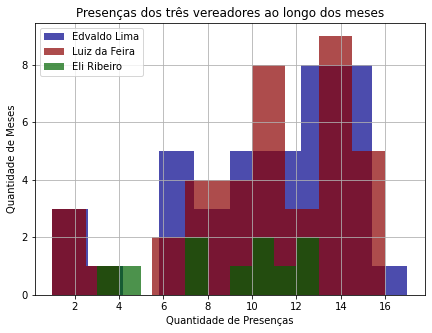

In [ ]:
hist_edvaldo_lima = edvaldo_lima['presencas']
hist_luiz_da_feira = luiz_da_feira['presencas']
hist_eli_ribeiro = eli_ribeiro['presencas']

plt.figure(figsize=(7,5))
plt.hist(hist_edvaldo_lima, bins = 10, color='DarkBlue', alpha = 0.7, label='Edvaldo Lima')
plt.hist(hist_luiz_da_feira, bins = 10, color='DarkRed', alpha = 0.7, label='Luiz da Feira')
plt.hist(hist_eli_ribeiro, bins = 10, color='DarkGreen', alpha = 0.7, label='Eli Ribeiro')
plt.legend(loc='best')
plt.title('Presenças dos três vereadores ao longo dos meses')
plt.ylabel('Quantidade de Meses')
plt.xlabel('Quantidade de Presenças')
plt.grid()
plt.show()

Como foi verificado pela tendência central, podemos perceber Edvaldo Lima e Luiz da Feira com maior quantidade de presenças, e apresentando uma distribuição semelhante. A distribuição desses dois vereadores apresenta assimetria negativa, a maioria das ocorrências está nas maiores quantidades de presenças.

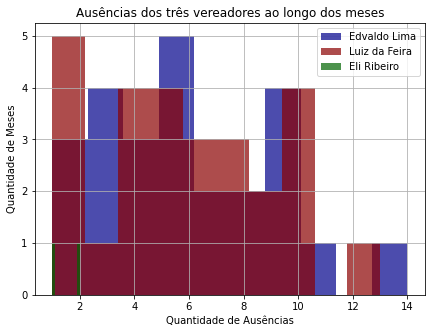

In [ ]:
hist_edvaldo_lima = edvaldo_lima['ausencias']
hist_luiz_da_feira = luiz_da_feira['ausencias']
hist_eli_ribeiro = eli_ribeiro['ausencias']

plt.figure(figsize=(7,5))
plt.hist(hist_edvaldo_lima, bins = 10, color='DarkBlue', alpha = 0.7, label='Edvaldo Lima')
plt.hist(hist_luiz_da_feira, bins = 10, color='DarkRed', alpha = 0.7, label='Luiz da Feira')
plt.hist(hist_eli_ribeiro, bins = 10, color='DarkGreen', alpha = 0.7, label='Eli Ribeiro')
plt.legend(loc='best')
plt.title('Ausências dos três vereadores ao longo dos meses')
plt.ylabel('Quantidade de Meses')
plt.xlabel('Quantidade de Ausências')
plt.grid()
plt.show()

Como foi verificado pela tendência central, podemos perceber Edvaldo Lima e Luiz da Feira com maior quantidade de ausências. A distribuição desses dois vereadores apresenta assimetria positiva, a maioria das ocorrências está nas menores quantidades de ausências. Para Eli Ribeiro, em poucos meses houve registro de ausências.

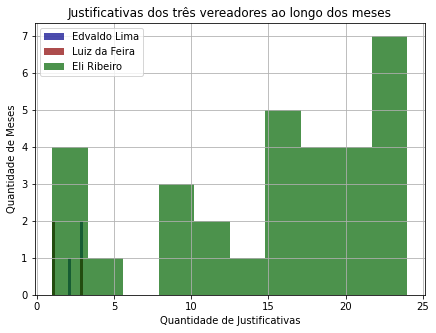

In [ ]:
hist_edvaldo_lima = edvaldo_lima['justificativas']
hist_luiz_da_feira = luiz_da_feira['justificativas']
hist_eli_ribeiro = eli_ribeiro['justificativas']

plt.figure(figsize=(7,5))
plt.hist(hist_edvaldo_lima, bins = 10, color='DarkBlue', alpha = 0.7, label='Edvaldo Lima')
plt.hist(hist_luiz_da_feira, bins = 10, color='DarkRed', alpha = 0.7, label='Luiz da Feira')
plt.hist(hist_eli_ribeiro, bins = 10, color='DarkGreen', alpha = 0.7, label='Eli Ribeiro')
plt.legend(loc='best')
plt.title('Justificativas dos três vereadores ao longo dos meses')
plt.ylabel('Quantidade de Meses')
plt.xlabel('Quantidade de Justificativas')
plt.grid()
plt.show()

Como foi verificado pela tendência central, podemos perceber Eli Ribeiro com maior quantidade de justificativas. A distribuição desse vereador apresenta assimetria negativa, a maioria das ocorrências está nas maiores quantidades de justificativas. Para Edvaldo Lima e Luiz da Feira, em poucos meses houve registro de justificativa.

#4 - Faça uma amostra temporal dos dados (escolha um período qualquer com no mínimo 12 meses e no máximo 24 meses) e repita a análise do item anterior. Discuta a comparação de resultados.

In [ ]:
vereador1 = (paineldf['name'] == 'EDVALDO LIMA')
vereador2 = (paineldf['name'] == 'LUIZ DA FEIRA')
vereador3 = (paineldf['name'] == 'ELI RIBEIRO')

janeiro = (paineldf['date'].dt.month == 1)
fevereiro = (paineldf['date'].dt.month == 2)
marco = (paineldf['date'].dt.month == 3)
abril = (paineldf['date'].dt.month == 4)
maio = (paineldf['date'].dt.month == 5)
junho = (paineldf['date'].dt.month == 6)
julho = (paineldf['date'].dt.month == 7)
agosto = (paineldf['date'].dt.month == 8)
setembro = (paineldf['date'].dt.month == 9)
outubro = (paineldf['date'].dt.month == 10)
novembro = (paineldf['date'].dt.month == 11)
dezembro = (paineldf['date'].dt.month == 12)

a2019 = (paineldf['date'].dt.year == 2019)
a2020 = (paineldf['date'].dt.year == 2020)

total_de_meses = len(paineldf['date'].dt.month[a2019].unique()) + len(paineldf['date'].dt.month[a2020].unique())
display('Total de Meses')
display(total_de_meses)

df_vereador1_19 = paineldf[['name', 'date', 'attendance']][vereador1 & a2019].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador1_19 = df_vereador1_19['attendance'].count().reset_index(name='quantidade')

df_vereador1_20 = paineldf[['name', 'date', 'attendance']][vereador1 & a2020].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador1_20 = df_vereador1_20['attendance'].count().reset_index(name='quantidade')

presencas_ver1 = df_vereador1_19[df_vereador1_19['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver1 = presencas_ver1 + df_vereador1_20[df_vereador1_20['attendance'] == 'attending']['quantidade'].tolist()

if len(presencas_ver1) < total_de_meses:
  l = total_de_meses - len(presencas_ver1)
  aux = [np.nan]*l
  presencas_ver1 = presencas_ver1 + aux
  
ausencias_ver1 = df_vereador1_19[df_vereador1_19['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver1 = ausencias_ver1 + df_vereador1_20[df_vereador1_20['attendance'] == 'absent']['quantidade'].tolist()

if len(ausencias_ver1) < total_de_meses:
  l = total_de_meses - len(ausencias_ver1)
  aux = [np.nan]*l
  ausencias_ver1 = ausencias_ver1 + aux

justificativas_ver1 = df_vereador1_19[df_vereador1_19['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver1 = justificativas_ver1 + df_vereador1_20[df_vereador1_20['attendance'] == 'justified']['quantidade'].tolist()

if len(justificativas_ver1) < total_de_meses:
  l = total_de_meses - len(justificativas_ver1)
  aux = [np.nan]*l
  justificativas_ver1 = justificativas_ver1 + aux

edvaldo_lima = pd.DataFrame({'presencas': presencas_ver1, 'ausencias': ausencias_ver1, 'justificativas': justificativas_ver1})

display('Média das Presenças do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['presencas'].mean(), 2))
display('Desvio Padrão das Presenças do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['presencas'].std(), 2))
display('Mediana das Presenças do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['presencas'].median(), 2))
display('Moda das Presenças do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['presencas'].mode(), 2))
print()

display('Média das Ausências do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['ausencias'].mean(), 2))
display('Desvio Padrão das Ausências do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['ausencias'].std(), 2))
display('Mediana das Ausências do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['ausencias'].median(), 2))
display('Moda das Ausências do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['ausencias'].mode(), 2))
print()

display('Média das Justificativas do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['justificativas'].mean(), 2))
display('Desvio Padrão das Justificativas do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['justificativas'].std(), 2))
display('Mediana das Justificativas do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['justificativas'].median(), 2))
display('Moda das Justificativas do Vereador EDVALDO LIMA (sessões por mês)')
display(round(edvaldo_lima['justificativas'].mode(), 2))
print()

df_vereador2_19 = paineldf[['name', 'date', 'attendance']][vereador2 & a2019].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador2_19 = df_vereador2_19['attendance'].count().reset_index(name='quantidade')

df_vereador2_20 = paineldf[['name', 'date', 'attendance']][vereador2 & a2020].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador2_20 = df_vereador2_20['attendance'].count().reset_index(name='quantidade')

presencas_ver2 = df_vereador2_19[df_vereador2_19['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver2 = presencas_ver2 + df_vereador2_20[df_vereador2_20['attendance'] == 'attending']['quantidade'].tolist()

if len(presencas_ver2) < total_de_meses:
  l = total_de_meses - len(presencas_ver2)
  aux = [np.nan]*l
  presencas_ver2 = presencas_ver2 + aux

ausencias_ver2 = df_vereador2_19[df_vereador2_19['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver2 = ausencias_ver2 + df_vereador2_20[df_vereador2_20['attendance'] == 'absent']['quantidade'].tolist()

if len(ausencias_ver2) < total_de_meses:
  l = total_de_meses - len(ausencias_ver2)
  aux = [np.nan]*l
  ausencias_ver2 = ausencias_ver2 + aux

justificativas_ver2 = df_vereador2_19[df_vereador2_19['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver2 = justificativas_ver2 + df_vereador2_20[df_vereador2_20['attendance'] == 'justified']['quantidade'].tolist()

if len(justificativas_ver2) < total_de_meses:
  l = total_de_meses - len(justificativas_ver2)
  aux = [np.nan]*l
  justificativas_ver2 = justificativas_ver2 + aux

luiz_da_feira = pd.DataFrame({'presencas': presencas_ver2, 'ausencias': ausencias_ver2, 'justificativas': justificativas_ver2})

display('Média das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['presencas'].mean(), 2))
display('Desvio Padrão das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['presencas'].std(), 2))
display('Mediana das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['presencas'].median(), 2))
display('Moda das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['presencas'].mode(), 2))
print()

display('Média das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['ausencias'].mean(), 2))
display('Desvio Padrão das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['ausencias'].std(), 2))
display('Mediana das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['ausencias'].median(), 2))
display('Moda das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['ausencias'].mode(), 2))
print()

display('Média das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['justificativas'].mean(), 2))
display('Desvio Padrão das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['justificativas'].std(), 2))
display('Mediana das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['justificativas'].median(), 2))
display('Moda das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)')
display(round(luiz_da_feira['justificativas'].mode(), 2))
print()

df_vereador3_19 = paineldf[['name', 'date', 'attendance']][vereador3 & a2019].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador3_19 = df_vereador3_19['attendance'].count().reset_index(name='quantidade')

df_vereador3_20 = paineldf[['name', 'date', 'attendance']][vereador3 & a2020].groupby(['name', paineldf['date'].dt.month, 'attendance'])
df_vereador3_20 = df_vereador3_20['attendance'].count().reset_index(name='quantidade')

presencas_ver3 = df_vereador3_19[df_vereador3_19['attendance'] == 'attending']['quantidade'].tolist()
presencas_ver3 = presencas_ver3 + df_vereador3_20[df_vereador3_20['attendance'] == 'attending']['quantidade'].tolist()

if len(presencas_ver3) < total_de_meses:
  l = total_de_meses - len(presencas_ver3)
  aux = [np.nan]*l
  presencas_ver3 = presencas_ver3 + aux

ausencias_ver3 = df_vereador3_19[df_vereador3_19['attendance'] == 'absent']['quantidade'].tolist()
ausencias_ver3 = ausencias_ver3 + df_vereador3_20[df_vereador3_20['attendance'] == 'absent']['quantidade'].tolist()

if len(ausencias_ver3) < total_de_meses:
  l = total_de_meses - len(ausencias_ver3)
  aux = [np.nan]*l
  ausencias_ver3 = ausencias_ver3 + aux

justificativas_ver3 = df_vereador3_19[df_vereador3_19['attendance'] == 'justified']['quantidade'].tolist()
justificativas_ver3 = justificativas_ver3 + df_vereador3_20[df_vereador3_20['attendance'] == 'justified']['quantidade'].tolist()

if len(justificativas_ver3) < total_de_meses:
  l = total_de_meses - len(justificativas_ver3)
  aux = [np.nan]*l
  justificativas_ver3 = justificativas_ver3 + aux

eli_ribeiro = pd.DataFrame({'presencas': presencas_ver3, 'ausencias': ausencias_ver3, 'justificativas': justificativas_ver3})

display('Média das Presenças do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['presencas'].mean(), 2))
display('Desvio Padrão das Presenças do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['presencas'].std(), 2))
display('Mediana das Presenças do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['presencas'].median(), 2))
display('Moda das Presenças do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['presencas'].mode(), 2))
print()

display('Média das Ausências do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['ausencias'].mean(), 2))
display('Desvio Padrão das Ausências do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['ausencias'].std(), 2))
display('Mediana das Ausências do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['ausencias'].median(), 2))
display('Moda das Ausências do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['ausencias'].mode(), 2))
print()

display('Média das Justificativas do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['justificativas'].mean(), 2))
display('Desvio Padrão das Justificativas do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['justificativas'].std(), 2))
display('Mediana das Justificativas do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['justificativas'].median(), 2))
display('Moda das Justificativas do Vereador ELI RIBEIRO (sessões por mês)')
display(round(eli_ribeiro['justificativas'].mode(), 2))
print()

'Total de Meses'

21

'Média das Presenças do Vereador EDVALDO LIMA (sessões por mês)'

10.0

'Desvio Padrão das Presenças do Vereador EDVALDO LIMA (sessões por mês)'

3.86

'Mediana das Presenças do Vereador EDVALDO LIMA (sessões por mês)'

10.0

'Moda das Presenças do Vereador EDVALDO LIMA (sessões por mês)'

0    13
dtype: int64

'Média das Ausências do Vereador EDVALDO LIMA (sessões por mês)'

5.64

'Desvio Padrão das Ausências do Vereador EDVALDO LIMA (sessões por mês)'

2.84

'Mediana das Ausências do Vereador EDVALDO LIMA (sessões por mês)'

6.0

'Moda das Ausências do Vereador EDVALDO LIMA (sessões por mês)'

0    8.0
1    9.0
dtype: float64

'Média das Justificativas do Vereador EDVALDO LIMA (sessões por mês)'

2.0

'Desvio Padrão das Justificativas do Vereador EDVALDO LIMA (sessões por mês)'

1.0

'Mediana das Justificativas do Vereador EDVALDO LIMA (sessões por mês)'

2.0

'Moda das Justificativas do Vereador EDVALDO LIMA (sessões por mês)'

0    1.0
1    3.0
dtype: float64

'Média das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)'

10.19

'Desvio Padrão das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)'

3.82

'Mediana das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)'

10.0

'Moda das Presenças do Vereador LUIZ DA FEIRA (sessões por mês)'

0    10
1    13
dtype: int64

'Média das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)'

5.64

'Desvio Padrão das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)'

3.14

'Mediana das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)'

5.0

'Moda das Ausências do Vereador LUIZ DA FEIRA (sessões por mês)'

0    4.0
dtype: float64

'Média das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)'

1.67

'Desvio Padrão das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)'

1.15

'Mediana das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)'

1.0

'Moda das Justificativas do Vereador LUIZ DA FEIRA (sessões por mês)'

0    1.0
dtype: float64

'Média das Presenças do Vereador ELI RIBEIRO (sessões por mês)'

9.22

'Desvio Padrão das Presenças do Vereador ELI RIBEIRO (sessões por mês)'

3.19

'Mediana das Presenças do Vereador ELI RIBEIRO (sessões por mês)'

10.0

'Moda das Presenças do Vereador ELI RIBEIRO (sessões por mês)'

0     7.0
1    10.0
2    13.0
dtype: float64

'Média das Ausências do Vereador ELI RIBEIRO (sessões por mês)'

1.5

'Desvio Padrão das Ausências do Vereador ELI RIBEIRO (sessões por mês)'

0.71

'Mediana das Ausências do Vereador ELI RIBEIRO (sessões por mês)'

1.5

'Moda das Ausências do Vereador ELI RIBEIRO (sessões por mês)'

0    1.0
1    2.0
dtype: float64

'Média das Justificativas do Vereador ELI RIBEIRO (sessões por mês)'

15.0

'Desvio Padrão das Justificativas do Vereador ELI RIBEIRO (sessões por mês)'

7.43

'Mediana das Justificativas do Vereador ELI RIBEIRO (sessões por mês)'

17.0

'Moda das Justificativas do Vereador ELI RIBEIRO (sessões por mês)'

0    19.0
1    21.0
dtype: float64

O vereador Edvaldo Lima apresentou uma média de 10 presenças, sendo que em mais de 50% dos meses mais de 10 presenças foram registradas. A moda da distribuição foi 13, na maioria dos meses o vereador esteve presente em 13 sessões.

O vereador Edvaldo Lima apresentou uma média de 5.64 ausências, sendo que em mais de 50% dos meses 6 ou menos ausências foram registradas. As modas da distribuição foram 8 e 9, na maioria dos meses o vereador se ausentou de 8 ou 9 sessões.

O vereador Edvaldo Lima apresentou uma média de 2 justificativas, sendo que em 50% dos meses 2 ou menos justificativas foram registradas. As modas da distribuição foram 1 e 3, na maioria dos meses o vereador justificou a ausência em 1 ou 3 sessões.

O vereador Luiz da Feira apresentou uma média de 10.19 presenças, sendo que em mais de 50% dos meses mais de 10 presenças foram registradas. As modas da distribuição foram 10 e 13, na maioria dos meses o vereador esteve presente em 10 ou 13 sessões.

O vereador Luiz da Feira apresentou uma média de 5.64 ausências, sendo que em mais de 50% dos meses 5 ou menos ausências foram registradas. A moda da distribuição foi na maioria dos meses o vereador se ausentou de 4 sessões.

O vereador Luiz da Feira apresentou uma média de 1.67 justificativas, sendo que em 50% dos meses 1  ou nenhuma justificativa foi registrada. A moda da distribuição foi 1, na maioria dos meses o vereador justificou a ausência em 1 sessão.

O vereador Eli Ribeiro apresentou uma média de 9.22 presenças, sendo que em mais de 50% dos meses 10 ou menos presenças foram registradas. A moda da distribuição foram 7, 10 e 13, na maioria dos meses o vereador esteve presente em 7, 10 ou 13 sessões. Comparado ao perídodo total, nos meses de 2019 e 2020 o vereador apresentou quantidades maiores de presença.

O vereador Eli Ribeiro apresentou uma média de 1.5 ausências, sendo que em mais de 50% dos meses 1.5 ou menos ausências foi registrada. As modas da distribuição foram 1 e 2, na maioria dos meses o vereador se ausentou de 1 ou 2 sessões.

O vereador Eli Ribeiro apresentou uma média de 15 justificativas, sendo que em 50% dos meses 17 ou mais justificativas foram registradas. As modas da distribuição foram 19 e 21, na maioria dos meses o vereador justificou a ausência em 19 ou 21 sessões.

Em todos os casos, os meses onde não houve registro de presenças, ausências e justificativas foram desconsiderados para os cálculos das medidas de tendência central de presenças, ausências e justificavas, respectivamente. Assim como no perídodo total dos dados, dentre esses vereadores, Eli Ribeiro apresentou menor quantidade de presenças e ausências, e maior número de justificativas. Os vereadores Edvaldo Lima e Luiz da Feira apresentaram a maior quantidade de presenças por mês, valores próximos de média e iguais de mediana, com Luiz da Feira tendo duas modas, uma maior e uma menor que a das presenças de Edvaldo Lima.

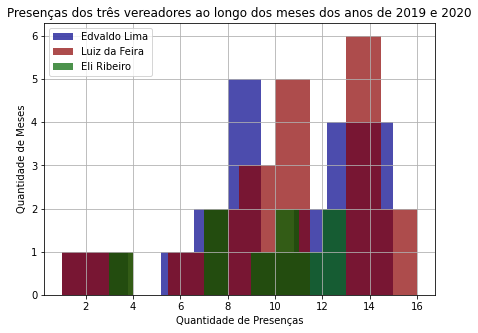

In [ ]:
hist_edvaldo_lima = edvaldo_lima['presencas']
hist_luiz_da_feira = luiz_da_feira['presencas']
hist_eli_ribeiro = eli_ribeiro['presencas']

plt.figure(figsize=(7,5))
plt.hist(hist_edvaldo_lima, bins = 10, color='DarkBlue', alpha = 0.7, label='Edvaldo Lima')
plt.hist(hist_luiz_da_feira, bins = 10, color='DarkRed', alpha = 0.7, label='Luiz da Feira')
plt.hist(hist_eli_ribeiro, bins = 10, color='DarkGreen', alpha = 0.7, label='Eli Ribeiro')
plt.legend(loc='best')
plt.title('Presenças dos três vereadores ao longo dos meses dos anos de 2019 e 2020')
plt.ylabel('Quantidade de Meses')
plt.xlabel('Quantidade de Presenças')
plt.grid()
plt.show()

Como foi verificado pela tendência central, podemos perceber Edvaldo Lima e Luiz da Feira com maior quantidade de presenças, e apresentando uma distribuição semelhante. A distribuição desses dois vereadores apresenta assimetria negativa, a maioria das ocorrências está nas maiores quantidades de presenças. Aqui também se observa as presenças de Eli Ribeiro em quantidades maiores.

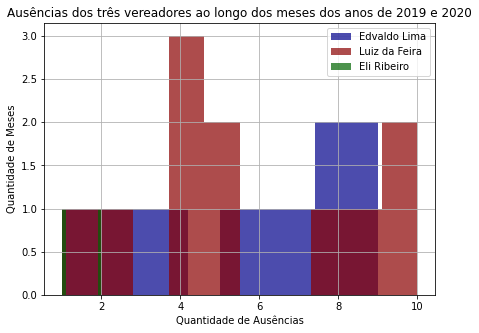

In [ ]:
hist_edvaldo_lima = edvaldo_lima['ausencias']
hist_luiz_da_feira = luiz_da_feira['ausencias']
hist_eli_ribeiro = eli_ribeiro['ausencias']

plt.figure(figsize=(7,5))
plt.hist(hist_edvaldo_lima, bins = 10, color='DarkBlue', alpha = 0.7, label='Edvaldo Lima')
plt.hist(hist_luiz_da_feira, bins = 10, color='DarkRed', alpha = 0.7, label='Luiz da Feira')
plt.hist(hist_eli_ribeiro, bins = 10, color='DarkGreen', alpha = 0.7, label='Eli Ribeiro')
plt.legend(loc='best')
plt.title('Ausências dos três vereadores ao longo dos meses dos anos de 2019 e 2020')
plt.ylabel('Quantidade de Meses')
plt.xlabel('Quantidade de Ausências')
plt.grid()
plt.show()

Como foi verificado pela tendência central, podemos perceber Edvaldo Lima e Luiz da Feira com maior quantidade de ausências. A distribuição das ausências de Edvaldo Lima apresenta assimetria positiva, a maioria das ocorrências está nas menores quantidades de ausências. A distribuição das ausências de Luiz da Feira apresenta uma assimetria negativa, a maioria das ocorrências está nas maiores quantidades de ausências. Para Eli Ribeiro, em poucos meses houve registro de ausências.

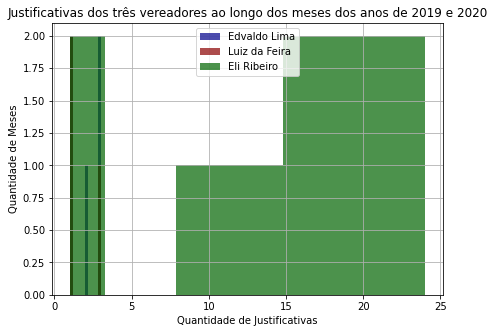

In [ ]:
hist_edvaldo_lima = edvaldo_lima['justificativas']
hist_luiz_da_feira = luiz_da_feira['justificativas']
hist_eli_ribeiro = eli_ribeiro['justificativas']

plt.figure(figsize=(7,5))
plt.hist(hist_edvaldo_lima, bins = 10, color='DarkBlue', alpha = 0.7, label='Edvaldo Lima')
plt.hist(hist_luiz_da_feira, bins = 10, color='DarkRed', alpha = 0.7, label='Luiz da Feira')
plt.hist(hist_eli_ribeiro, bins = 10, color='DarkGreen', alpha = 0.7, label='Eli Ribeiro')
plt.legend(loc='best')
plt.title('Justificativas dos três vereadores ao longo dos meses dos anos de 2019 e 2020')
plt.ylabel('Quantidade de Meses')
plt.xlabel('Quantidade de Justificativas')
plt.grid()
plt.show()

Como foi verificado pela tendência central, podemos perceber Eli Ribeiro com maior quantidade de justificativas. A distribuição desse vereador apresenta assimetria negativa, a maioria das ocorrências está nas maiores quantidades de justificativas. Para Edvaldo Lima e Luiz da Feira, em poucos meses houve registro de justificativa.

#5 - Determine o total de presenças, ausências e faltas justificadas para cada data (independente do vereador). Determine o dia da semana de cada data. Faça um boxplot para cada dia da semana com os valores diários obtidos. Como se distribuem presenças, ausências e faltas justificadas a cada dia da semana?

In [ ]:
segunda = (paineldf['date'].dt.weekday == 0)
terca = (paineldf['date'].dt.weekday == 1)
quarta = (paineldf['date'].dt.weekday == 2)
quinta = (paineldf['date'].dt.weekday == 3)
sexta = (paineldf['date'].dt.weekday == 4)
domingo = (paineldf['date'].dt.weekday == 6)

'Total de sessões'

126

'Comparecimento nas segundas-feiras'

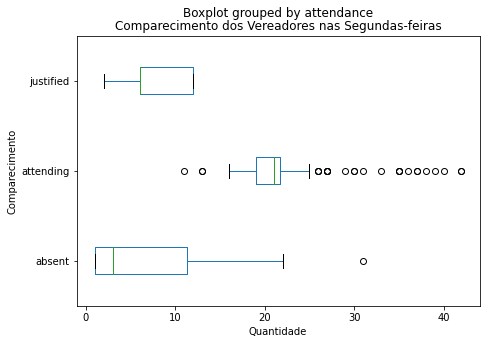

In [ ]:
painel_segunda = paineldf[['session','attendance', 'date']][segunda].groupby(['attendance', 'date'])
painel_segunda = painel_segunda['attendance'].count().reset_index(name='quantidade')

display('Total de sessões')
display(painel_segunda['date'].unique().size)
print()

display('Comparecimento nas segundas-feiras')
boxplot_segunda = painel_segunda.boxplot(
    column=['quantidade'],
    by='attendance',
    vert=False,
    figsize=(7,5))
boxplot_segunda.set_ylabel('Comparecimento')
boxplot_segunda.set_xlabel('Quantidade')
boxplot_segunda.set_title('Comparecimento dos Vereadores nas Segundas-feiras');
boxplot_segunda.grid(False)

'Total de sessões'

131

'Comparecimento nas terças-feiras'

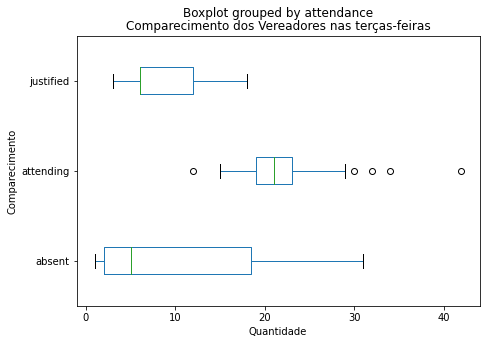

In [ ]:
painel_terca = paineldf[['session','attendance', 'date']][terca].groupby(['attendance', 'date'])
painel_terca = painel_terca['attendance'].count().reset_index(name='quantidade')

display('Total de sessões')
display(painel_terca['date'].unique().size)
print()

display('Comparecimento nas terças-feiras')
boxplot_terca = painel_terca.boxplot(
    column=['quantidade'],
    by='attendance',
    vert=False,
    figsize=(7,5))
boxplot_terca.set_ylabel('Comparecimento')
boxplot_terca.set_xlabel('Quantidade')
boxplot_terca.set_title('Comparecimento dos Vereadores nas terças-feiras');
boxplot_terca.grid(False)

'Total de sessões'

125

'Comparecimento nas quartas-feiras'

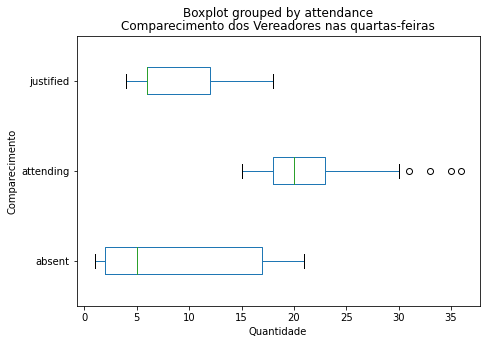

In [ ]:
painel_quarta = paineldf[['session','attendance', 'date']][quarta].groupby(['attendance', 'date'])
painel_quarta = painel_quarta['attendance'].count().reset_index(name='quantidade')

display('Total de sessões')
display(painel_quarta['date'].unique().size)
print()

display('Comparecimento nas quartas-feiras')
boxplot_quarta = painel_quarta.boxplot(
    column=['quantidade'],
    by='attendance',
    vert=False,
    figsize=(7,5))
boxplot_quarta.set_ylabel('Comparecimento')
boxplot_quarta.set_xlabel('Quantidade')
boxplot_quarta.set_title('Comparecimento dos Vereadores nas quartas-feiras');
boxplot_quarta.grid(False)

'Total de sessões'

42

'Comparecimento nas quintas-feiras'

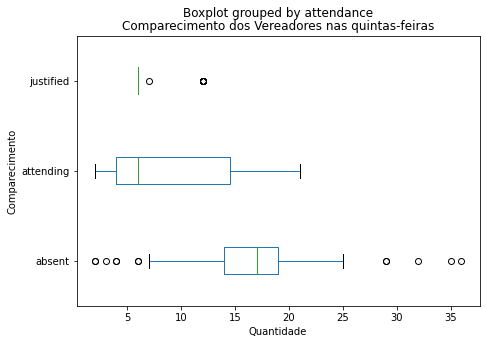

In [ ]:
painel_quinta = paineldf[['session','attendance', 'date']][quinta].groupby(['attendance', 'date'])
painel_quinta = painel_quinta['attendance'].count().reset_index(name='quantidade')

display('Total de sessões')
display(painel_quinta['date'].unique().size)
print()

display('Comparecimento nas quintas-feiras')
boxplot_quinta = painel_quinta.boxplot(
    column=['quantidade'],
    by='attendance',
    vert=False,
    figsize=(7,5))
boxplot_quinta.set_ylabel('Comparecimento')
boxplot_quinta.set_xlabel('Quantidade')
boxplot_quinta.set_title('Comparecimento dos Vereadores nas quintas-feiras');
boxplot_quinta.grid(False)

'Total de sessões'

13

'Comparecimento nas sextas-feiras'

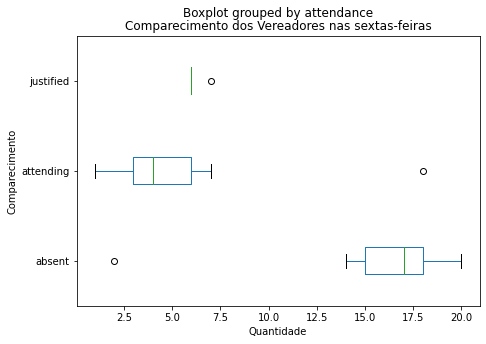

In [ ]:
painel_sexta = paineldf[['session','attendance', 'date']][sexta].groupby(['attendance', 'date'])
painel_sexta = painel_sexta['attendance'].count().reset_index(name='quantidade')

display('Total de sessões')
display(painel_sexta['date'].unique().size)
print()

display('Comparecimento nas sextas-feiras')
boxplot_sexta = painel_sexta.boxplot(
    column=['quantidade'],
    by='attendance',
    vert=False,
    figsize=(7,5))
boxplot_sexta.set_ylabel('Comparecimento')
boxplot_sexta.set_xlabel('Quantidade')
boxplot_sexta.set_title('Comparecimento dos Vereadores nas sextas-feiras');
boxplot_sexta.grid(False)

'Total de sessões'

1

'Comparecimento nos domingos'

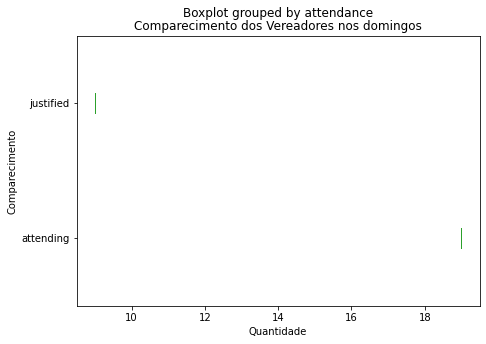

In [ ]:
painel_domingo = paineldf[['session','attendance', 'date']][domingo].groupby(['attendance', 'date'])
painel_domingo = painel_domingo['attendance'].count().reset_index(name='quantidade')

display('Total de sessões')
display(painel_domingo['date'].unique().size)
print()

display('Comparecimento nos domingos')
boxplot_domingo = painel_domingo.boxplot(
    column=['quantidade'],
    by='attendance',
    vert=False,
    figsize=(7,5))
boxplot_domingo.set_ylabel('Comparecimento')
boxplot_domingo.set_xlabel('Quantidade')
boxplot_domingo.set_title('Comparecimento dos Vereadores nos domingos');
boxplot_domingo.grid(False)

De modo geral, as segundas, terças e quartas-feiras foram os dias onde mais ocorreram sessões, e também onde mais vereadores estavam presentes, com medianas próximas de 20. Nesses dias, em certas datas, a quantidade de presenças ultrapassa a quantidade de vereadores, por conta da ocorrências de mais de uma sessão durante o dia.

As quintas e sextas-feiras foram os dias onde mais ausências foram contabilizadas, apresentando medianas próximas de 17, em mais de 50% das sessões nesses dias da semana houve mais de 17 ausências. Nas quintas, em certas datas, a quantidade de ausências ultrapassa a quantidade de vereadores, por conta da ocorrências de mais de uma sessão durante o dia.

As justificativas apresentaram uma distribuição comum ao longo dos dias da semana, exceto aos domingos, sempre com valores e quantidade de amostras menores em relação a ausências e presenças.

Não há dados de sessões aos sábados no conjunto de dados. Ocorreu apenas uma sessão aos domingos, onde não houve ausência de vereadores, foram 19 presenças e 9 justificativas.

#6 - Determine o total de presenças, ausências e faltas justificadas a cada mês de cada ano (independente do vereador). Faça um gráfico com boxplots mensais de presença, outro com boxplots mensais de ausência e outro com boxplots mensais de faltas justificadas para cada mês com os valores mensais obtidos (cada mês de cada ano será um ponto em cada boxplot). Como se distribuem presenças, ausências e faltas justificadas a cada mês de cada ano e como se comparam entre si?

In [ ]:
janeiro = (paineldf['date'].dt.month == 1)
fevereiro = (paineldf['date'].dt.month == 2)
marco = (paineldf['date'].dt.month == 3)
abril = (paineldf['date'].dt.month == 4)
maio = (paineldf['date'].dt.month == 5)
junho = (paineldf['date'].dt.month == 6)
julho = (paineldf['date'].dt.month == 7)
agosto = (paineldf['date'].dt.month == 8)
setembro = (paineldf['date'].dt.month == 9)
outubro = (paineldf['date'].dt.month == 10)
novembro = (paineldf['date'].dt.month == 11)
dezembro = (paineldf['date'].dt.month == 12)

filtro_mes = [janeiro, fevereiro, marco, abril, maio, junho, julho, agosto, setembro, outubro, novembro, dezembro]

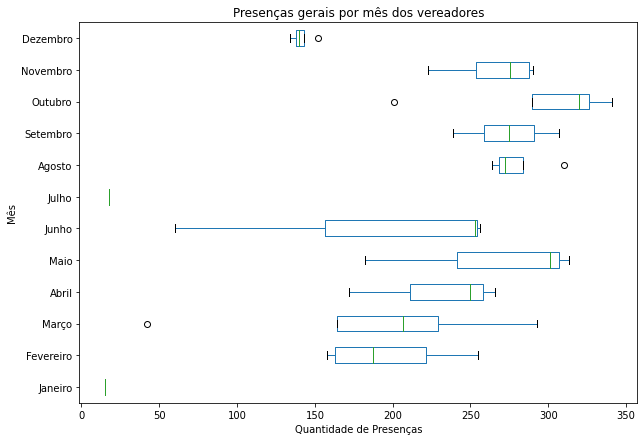

In [ ]:
presencas_gerais_mensais = pd.DataFrame()
for m in filtro_mes:
  l = {}
  for y in sorted(anos):
    aux = paineldf[['attendance', 'date']][m].groupby(['attendance', 'date'])
    aux = aux['attendance'].count().reset_index(name='quantidade')
    soma = aux['quantidade'][(aux['attendance'] == 'attending') & (aux['date'].dt.year == y)].sum() if aux['quantidade'][(aux['attendance'] == 'attending') & (aux['date'].dt.year == y)].sum() + aux['quantidade'][(aux['attendance'] == 'absent') & (aux['date'].dt.year == y)].sum() + aux['quantidade'][(aux['attendance'] == 'justified') & (aux['date'].dt.year == y)].sum() > 0 else np.nan
    l[y] = soma
  
  df = pd.DataFrame([[l[2017], l[2018], l[2019], l[2020], l[2021]]], columns=[2017, 2018, 2019, 2020, 2021])
  presencas_gerais_mensais = presencas_gerais_mensais.append(df, ignore_index=False)

presencas_gerais_mensais.index=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

boxplot_presencas = presencas_gerais_mensais.transpose().boxplot(
      vert=False,
      figsize=(10, 7))
boxplot_presencas.set_ylabel('Mês')
boxplot_presencas.set_xlabel('Quantidade de Presenças')
boxplot_presencas.set_title('Presenças gerais por mês dos vereadores');
boxplot_presencas.grid(False)

Para a quantidade geral de presenças dos vereadores, para os meses de janeiro e julho, o boxplot somente aponta a mediana e não possui bigodes, indicando que apenas em um houve sessões no período compreendido pelo conjunto de dados, indicando que são meses onde possivelmente há um recesso. Em ambos os casos a presença foi superior a 50% dos vereadores.

De forma geral, a distribuição das presenças tem um aumento da mediana ao longo dos primeiros meses, e uma diminuição nos últimos meses. Por apresentarem boxplots menores, e com base na localização deles, há uma indicação que os meses de agosto a novembro são os meses com maior participação média em sessões.

Desconsiderando janeiro e julho, o mês de dezembro apresentou a menor quantidade de presenças, com mediana próxima de 150, o mês de outubro apresentou a maior mediana, acima de 320, no mês de setembro as quantidades de presenças formaram uma distribuição próxima de uma distribuição normal.

Alguns meses apresentam pontos com valores bem menores em relação aos valores comuns à distribuição formada, como junho, outubro e março. No caso de junho a justificativa pode ser o ano de 2020, onde foram suspensas algumas sessões por conta da pandemia. Em relação a outubro, pode ser consequência da preparação para as eleições de novembro de 2020. No que diz respeito a março, o conjunto de dados tem como última data 09/03/2021, indicando que poucas sessões foram contabilizadas no ano de 2021.

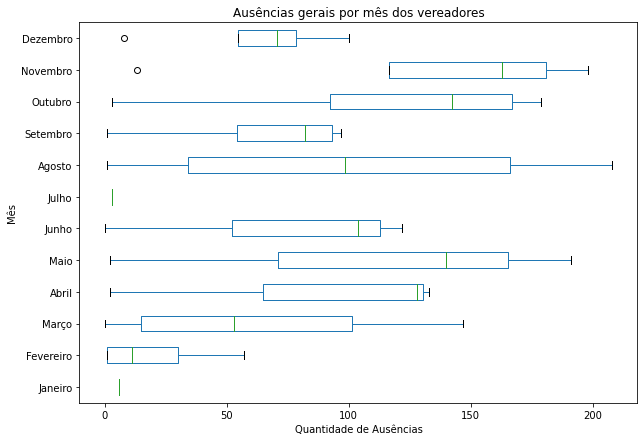

In [ ]:
ausencias_gerais_mensais = pd.DataFrame()
for m in filtro_mes:
  l = {}
  for y in sorted(anos):
    aux = paineldf[['attendance', 'date']][m].groupby(['attendance', 'date'])
    aux = aux['attendance'].count().reset_index(name='quantidade')
    soma = aux['quantidade'][(aux['attendance'] == 'absent') & (aux['date'].dt.year == y)].sum() if aux['quantidade'][(aux['attendance'] == 'attending') & (aux['date'].dt.year == y)].sum() + aux['quantidade'][(aux['attendance'] == 'absent') & (aux['date'].dt.year == y)].sum() + aux['quantidade'][(aux['attendance'] == 'justified') & (aux['date'].dt.year == y)].sum() > 0 else np.nan
    l[y] = soma
  
  df = pd.DataFrame([[l[2017], l[2018], l[2019], l[2020], l[2021]]], columns=[2017, 2018, 2019, 2020, 2021])
  ausencias_gerais_mensais = ausencias_gerais_mensais.append(df, ignore_index=False)

ausencias_gerais_mensais.index=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

boxplot_ausencias = ausencias_gerais_mensais.transpose().boxplot(
      vert=False,
      figsize=(10, 7))
boxplot_ausencias.set_ylabel('Mês')
boxplot_ausencias.set_xlabel('Quantidade de Ausências')
boxplot_ausencias.set_title('Ausências gerais por mês dos vereadores');
boxplot_ausencias.grid(False)

Para a quantidade geral de ausências dos vereadores, para os meses de janeiro e julho, o boxplot somente aponta a mediana e não possui bigodes,  justificativa igual à para as presenças.

Desconsiderando janeiro e julho, o mês de fevereiro apresentou a menor quantidade de ausências, com máximo de pouco mais de 50, e em pelo menos 50% dos anos valores menores que 25. O mês de novembro apresentou a maior mediana, próxima de 175.

No mês de agosto as quantidades de ausências formaram uma distribuição próxima de uma distribuição normal. Os meses de fevereiro, março, abril, junho, setembro e dezembro apresentaram distribuições de ausências com 100% dos valores menores que 150.

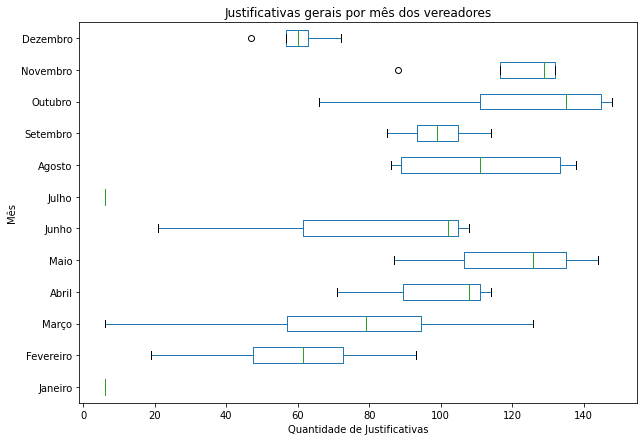

In [ ]:
justificativas_gerais_mensais = pd.DataFrame()
for m in filtro_mes:
  l = {}
  for y in sorted(anos):
    aux = paineldf[['attendance', 'date']][m].groupby(['attendance', 'date'])
    aux = aux['attendance'].count().reset_index(name='quantidade')
    soma = aux['quantidade'][(aux['attendance'] == 'justified') & (aux['date'].dt.year == y)].sum() if aux['quantidade'][(aux['attendance'] == 'attending') & (aux['date'].dt.year == y)].sum() + aux['quantidade'][(aux['attendance'] == 'absent') & (aux['date'].dt.year == y)].sum() + aux['quantidade'][(aux['attendance'] == 'justified') & (aux['date'].dt.year == y)].sum() > 0 else np.nan
    l[y] = soma
  
  df = pd.DataFrame([[l[2017], l[2018], l[2019], l[2020], l[2021]]], columns=[2017, 2018, 2019, 2020, 2021])
  justificativas_gerais_mensais = justificativas_gerais_mensais.append(df, ignore_index=False)

justificativas_gerais_mensais.index=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

boxplot_justificativas = justificativas_gerais_mensais.transpose().boxplot(
      vert=False,
      figsize=(10, 7))
boxplot_justificativas.set_ylabel('Mês')
boxplot_justificativas.set_xlabel('Quantidade de Justificativas')
boxplot_justificativas.set_title('Justificativas gerais por mês dos vereadores');
boxplot_justificativas.grid(False)

Para a quantidade geral de justificativas dos vereadores, para os meses de janeiro e julho, o boxplot somente aponta a mediana e não possui bigodes,  justificativa igual à para as presenças.

Desconsiderando janeiro e julho, os meses de fevereiro e dezembro apresentaram as menores medianas, próximas de 60, em 50% dos anos a quantidade de justificativas foi menor que esse valor. O mês de outubro  apresentou a maior mediana, próxima de 140.

Nos meses de fevereiro, agosto, e setembro as quantidades de justificativas formaram uma distribuição próxima de uma distribuição normal. Os meses de abril, maio, agosto, setembro, outubro e novembro apresentaram distribuições de justificativas com 100% dos valores maiores que 60.

#7 - Escolha 2 vereadores, determine a quantidade de presenças de cada um a cada mês a cada ano. Considerando as quantidades de presenças a cada mês de cada vereador, faça um gráfico de dispersão entre vereadores. Discuta o que observa no gráfico.

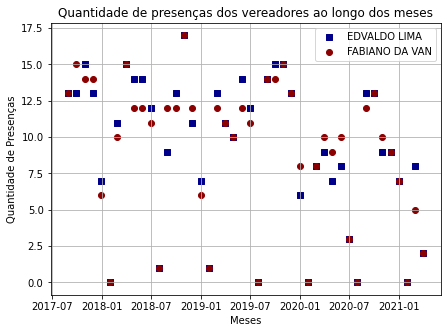

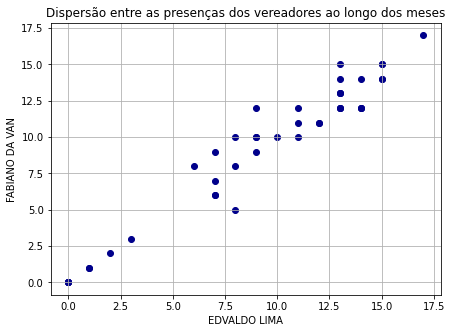

'Coeficiente de correlação de Pearson entre as presenças mensais dos vereadores EDVALDO LIMA e FABIANO DA VAN'

,EDVALDO LIMA,FABIANO DA VAN
EDVALDO LIMA,1.000000,0.972819
FABIANO DA VAN,0.972819,1.000000


In [ ]:
vereador1 = (paineldf['name'] == 'EDVALDO LIMA')
vereador2 = (paineldf['name'] == 'FABIANO DA VAN')

mensalmente = [pd.Grouper(key='date', freq='M')]

presenca_mensal_vereador1 = paineldf[['attendance', 'date']][presenca & vereador1].groupby(mensalmente)
presenca_mensal_vereador1 = presenca_mensal_vereador1['attendance'].count().reset_index(
    name='quantidade')

presenca_mensal_vereador2 = paineldf[['attendance', 'date']][presenca & vereador2].groupby(mensalmente)
presenca_mensal_vereador2 = presenca_mensal_vereador2['attendance'].count().reset_index(
    name='quantidade')

plt.figure(figsize=(7,5))
plt.scatter(x=presenca_mensal_vereador1['date'],
            y=presenca_mensal_vereador1['quantidade'],
            c='DarkBlue',
            marker='s',
            label='EDVALDO LIMA')
plt.scatter(x=presenca_mensal_vereador2['date'],
            y=presenca_mensal_vereador2['quantidade'],
            c='DarkRed',
            marker='o',
            label='FABIANO DA VAN')
plt.legend(loc='best')
plt.title('Quantidade de presenças dos vereadores ao longo dos meses')
plt.ylabel('Quantidade de Presenças')
plt.xlabel('Meses')
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(x=presenca_mensal_vereador1['quantidade'],
            y=presenca_mensal_vereador2['quantidade'],
            c='DarkBlue',
            marker='o')
plt.title('Dispersão entre as presenças dos vereadores ao longo dos meses')
plt.ylabel('FABIANO DA VAN')
plt.xlabel('EDVALDO LIMA')
plt.grid()
plt.show()

presenca_mensal = pd.DataFrame({
    'EDVALDO LIMA': presenca_mensal_vereador1['quantidade'],
    'FABIANO DA VAN': presenca_mensal_vereador2['quantidade']
})
presenca_mensal = presenca_mensal.fillna(0)

print('')
display('Coeficiente de correlação de Pearson entre as presenças mensais dos vereadores EDVALDO LIMA e FABIANO DA VAN')
display(presenca_mensal.corr(method='pearson'))

Por meio da visualização do gráfico que exibe a quantidade de presenças mensais dos vereadores ao longo dos meses, pode ser percebido que os pontos estão próximos no eixo y, e, em alguns casos, sobrepostos. Os quadrados vermelhos indicam quantidades de presença iguais dos dois vereadores.

O coeficiente de correlação Pearson igual a 0.972819 indica uma correlação positiva forte entre a quantidade de presenças mensais dos vereadores Edvaldo Lima e Fabiano da Van.

Pelos gráficos apresentados, e também pelo fato de os dois vereadores pertencerem ao mesmo partido, o MDB, não pode ser afirmado, mas há uma indicação de que estão presentes de forma conjunta nas sessões realizadas.

#8 - Agora é com você, crie mais 2 perguntas relevantes (pense como um jornalista investigativo) que possam ser respondidas com este conjunto de dados. Justifique a relevância de sua pergunta, faça sua análise de dados e discuta a sua resposta escrita.

#8.1 - Com a justificativa de que os vereadores mais presentes, teoricamente, são os mais atuantes nos debates, demonstrando comprometimento com a sua ocupação. Avalie a transição das cadeiras decorrente do resultado das eleições de 2020.

#Identifique os vereadores que não foram reeleitos, e avalie se coincidem com os vereadores que apresentaram maior quantidade de ausências nas sessões realizadas de agosto de 2017 a outubro de 2020 (a eleição ocorreu no mês de novembro).

In [ ]:
veradores_nao_reeleitos = sorted([vereador for vereador in lista2020 if vereador not in vereadores_todo_ano])
display('Vereadores que não foram reeleitos')
display(veradores_nao_reeleitos)

'Vereadores que não foram reeleitos'

['ALBERTO NERY',
 'ANTONIO CARLOS ATAÍDE',
 'CADMIEL PEREIRA',
 'CÍNTIA MACHADO',
 'GILMAR AMORIM',
 'ISAÍAS DE DIOGO',
 'JOÃO BILILIU',
 'JUSTINIANO FRANÇA',
 'MARCOS LIMA',
 'NEINHA',
 'PABLO ROBERTO',
 'PR TOM',
 'ROBECI DA VASSOURA',
 'ROBERTO TOURINHO',
 'RONNY',
 'SGT JOSAFÁ RAMOS',
 'ZÉ FILÉ']

In [ ]:
ausencias = paineldf[['name', 'attendance']][ausencia & (paineldf['date'] < '2020-10-31')].groupby('name')
ausencias = ausencias['attendance'].count().reset_index(
    name='quantidade').sort_values('quantidade', ascending=False)
display(ausencias)

,name,quantidade
3,CÍNTIA MACHADO,234
1,ANTONIO CARLOS ATAÍDE,172
24,ZÉ FILÉ,169
6,EREMITA MOTA,166
16,NEINHA,164
0,ALBERTO NERY,161
21,RON DO POVO,159
7,FABIANO DA VAN,157
13,LUIZ DA FEIRA,156
23,ZÉ CURUCA,154


Entre os 10 vereadores que apresentaram maior quantidade de ausências, apenas os vereadores Cíntia Machado, Zé File, Antonio Carlos Ataíde e Alberto Nery não foram reeleitos. Não se pode afirmar que a quantidade de ausências tem influencia direta na não reeleição dos vereadores.

#8.2 - Como no item 7, os vereadores apresentaram uma forte correlação entre as quantidades de presenças ao longo dos meses, e houve uma indicação que o fato de serem do mesmo partido ter influência. Escolha 2 vereadores de partidos diferentes, e repita a análise.

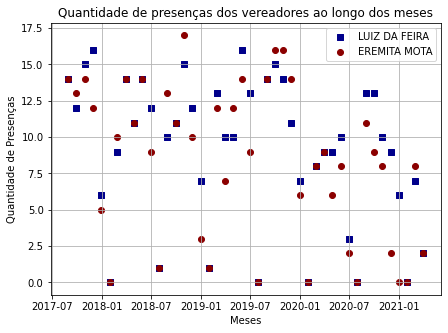

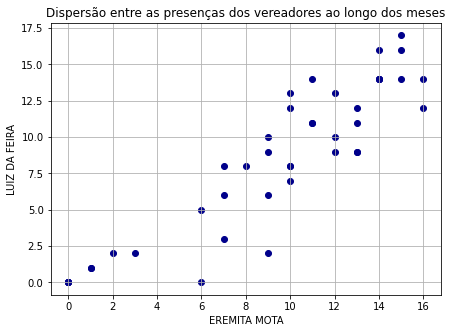

'Coeficiente de correlação de Pearson entre as presenças mensais dos vereadores LUIZ DA FEIRA e EREMITA MOTA'

,LUIZ DA FEIRA,EREMITA MOTA
LUIZ DA FEIRA,1.000000,0.913576
EREMITA MOTA,0.913576,1.000000


In [ ]:
vereador1 = (paineldf['name'] == 'LUIZ DA FEIRA')
vereador2 = (paineldf['name'] == 'EREMITA MOTA')

mensalmente = [pd.Grouper(key='date', freq='M')]

presenca_mensal_vereador1 = paineldf[['attendance', 'date']][presenca & vereador1].groupby(mensalmente)
presenca_mensal_vereador1 = presenca_mensal_vereador1['attendance'].count().reset_index(
    name='quantidade')

presenca_mensal_vereador2 = paineldf[['attendance', 'date']][presenca & vereador2].groupby(mensalmente)
presenca_mensal_vereador2 = presenca_mensal_vereador2['attendance'].count().reset_index(
    name='quantidade')

plt.figure(figsize=(7,5))
plt.scatter(x=presenca_mensal_vereador1['date'],
            y=presenca_mensal_vereador1['quantidade'],
            c='DarkBlue',
            marker='s',
            label='LUIZ DA FEIRA')
plt.scatter(x=presenca_mensal_vereador2['date'],
            y=presenca_mensal_vereador2['quantidade'],
            c='DarkRed',
            marker='o',
            label='EREMITA MOTA')
plt.legend(loc='best')
plt.title('Quantidade de presenças dos vereadores ao longo dos meses')
plt.ylabel('Quantidade de Presenças')
plt.xlabel('Meses')
plt.grid()
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(x=presenca_mensal_vereador1['quantidade'],
            y=presenca_mensal_vereador2['quantidade'],
            c='DarkBlue',
            marker='o')
plt.title('Dispersão entre as presenças dos vereadores ao longo dos meses')
plt.ylabel('LUIZ DA FEIRA')
plt.xlabel('EREMITA MOTA')
plt.grid()
plt.show()

presenca_mensal = pd.DataFrame({
    'LUIZ DA FEIRA': presenca_mensal_vereador1['quantidade'],
    'EREMITA MOTA': presenca_mensal_vereador2['quantidade']
})
presenca_mensal = presenca_mensal.fillna(0)

print('')
display('Coeficiente de correlação de Pearson entre as presenças mensais dos vereadores LUIZ DA FEIRA e EREMITA MOTA')
display(presenca_mensal.corr(method='pearson'))

Por meio da visualização do gráfico que exibe a quantidade de presenças mensais dos vereadores ao longo dos meses, pode ser percebido que os pontos estão próximos no eixo y, e, em alguns casos, sobrepostos. Os quadrados vermelhos indicam quantidades de presença iguais dos dois vereadores.

O coeficiente de correlação Pearson igual a 0.913576 indica uma correlação positiva forte entre a quantidade de presenças mensais dos vereadores Luiz da Feira e Eremita Mota.

Pelos gráficos apresentados, e comparando os resultados aqui e do item 7, vimos que a correlação diminuiu, mas ainda é positiva forte, indicando que serem de mesmo partido não necessariamente implica em presença na mesma quantidade de presença em sessões.